In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

import plotly.express as px 
from plotly.offline import iplot , plot 
from plotly.subplots import make_subplots

In [2]:
df =pd.read_csv("heart.csv")

In [3]:
df.head().style.set_properties(**{'background-color': 'bisque',
                           'color': 'black'})

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.000000,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.000000,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.000000,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.500000,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.000000,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.isna().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [6]:
df.isnull().sum().to_frame()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [7]:
df.describe().style.set_properties(**{'background-color': 'lightskyblue',
                           'color': 'black'})

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
people_dict = df["HeartDisease"].value_counts(normalize=True).to_dict()
people_dict["Heart Disease"] = people_dict.pop(1)
people_dict["Normal"] = people_dict.pop(0)
df = df[df["RestingBP"] != 0]

Text(0.5, 1.0, 'Distribution of Target Value')

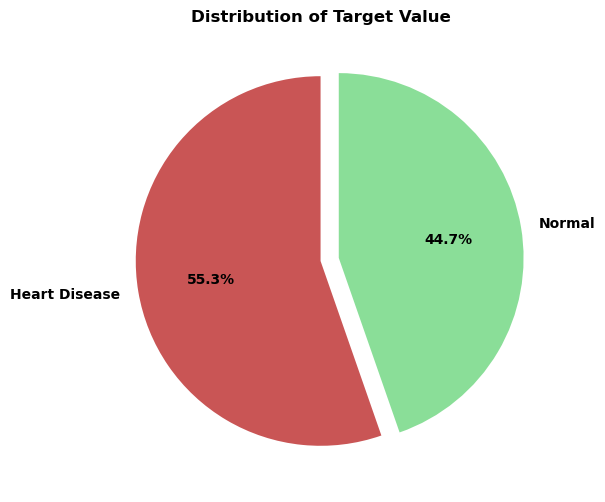

In [9]:
plt.figure(figsize=(8,6),dpi=100)
labels = people_dict.keys()
sizes = people_dict.values()
colors = ["#C95555", "#8ADE98"]
explode = (0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False,colors=colors, startangle=90, textprops={'fontsize': 10, "fontweight" : "bold"})
plt.title("Distribution of Target Value", size=12, fontweight="bold")

C:\Users\Hp\AnacondaFolder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



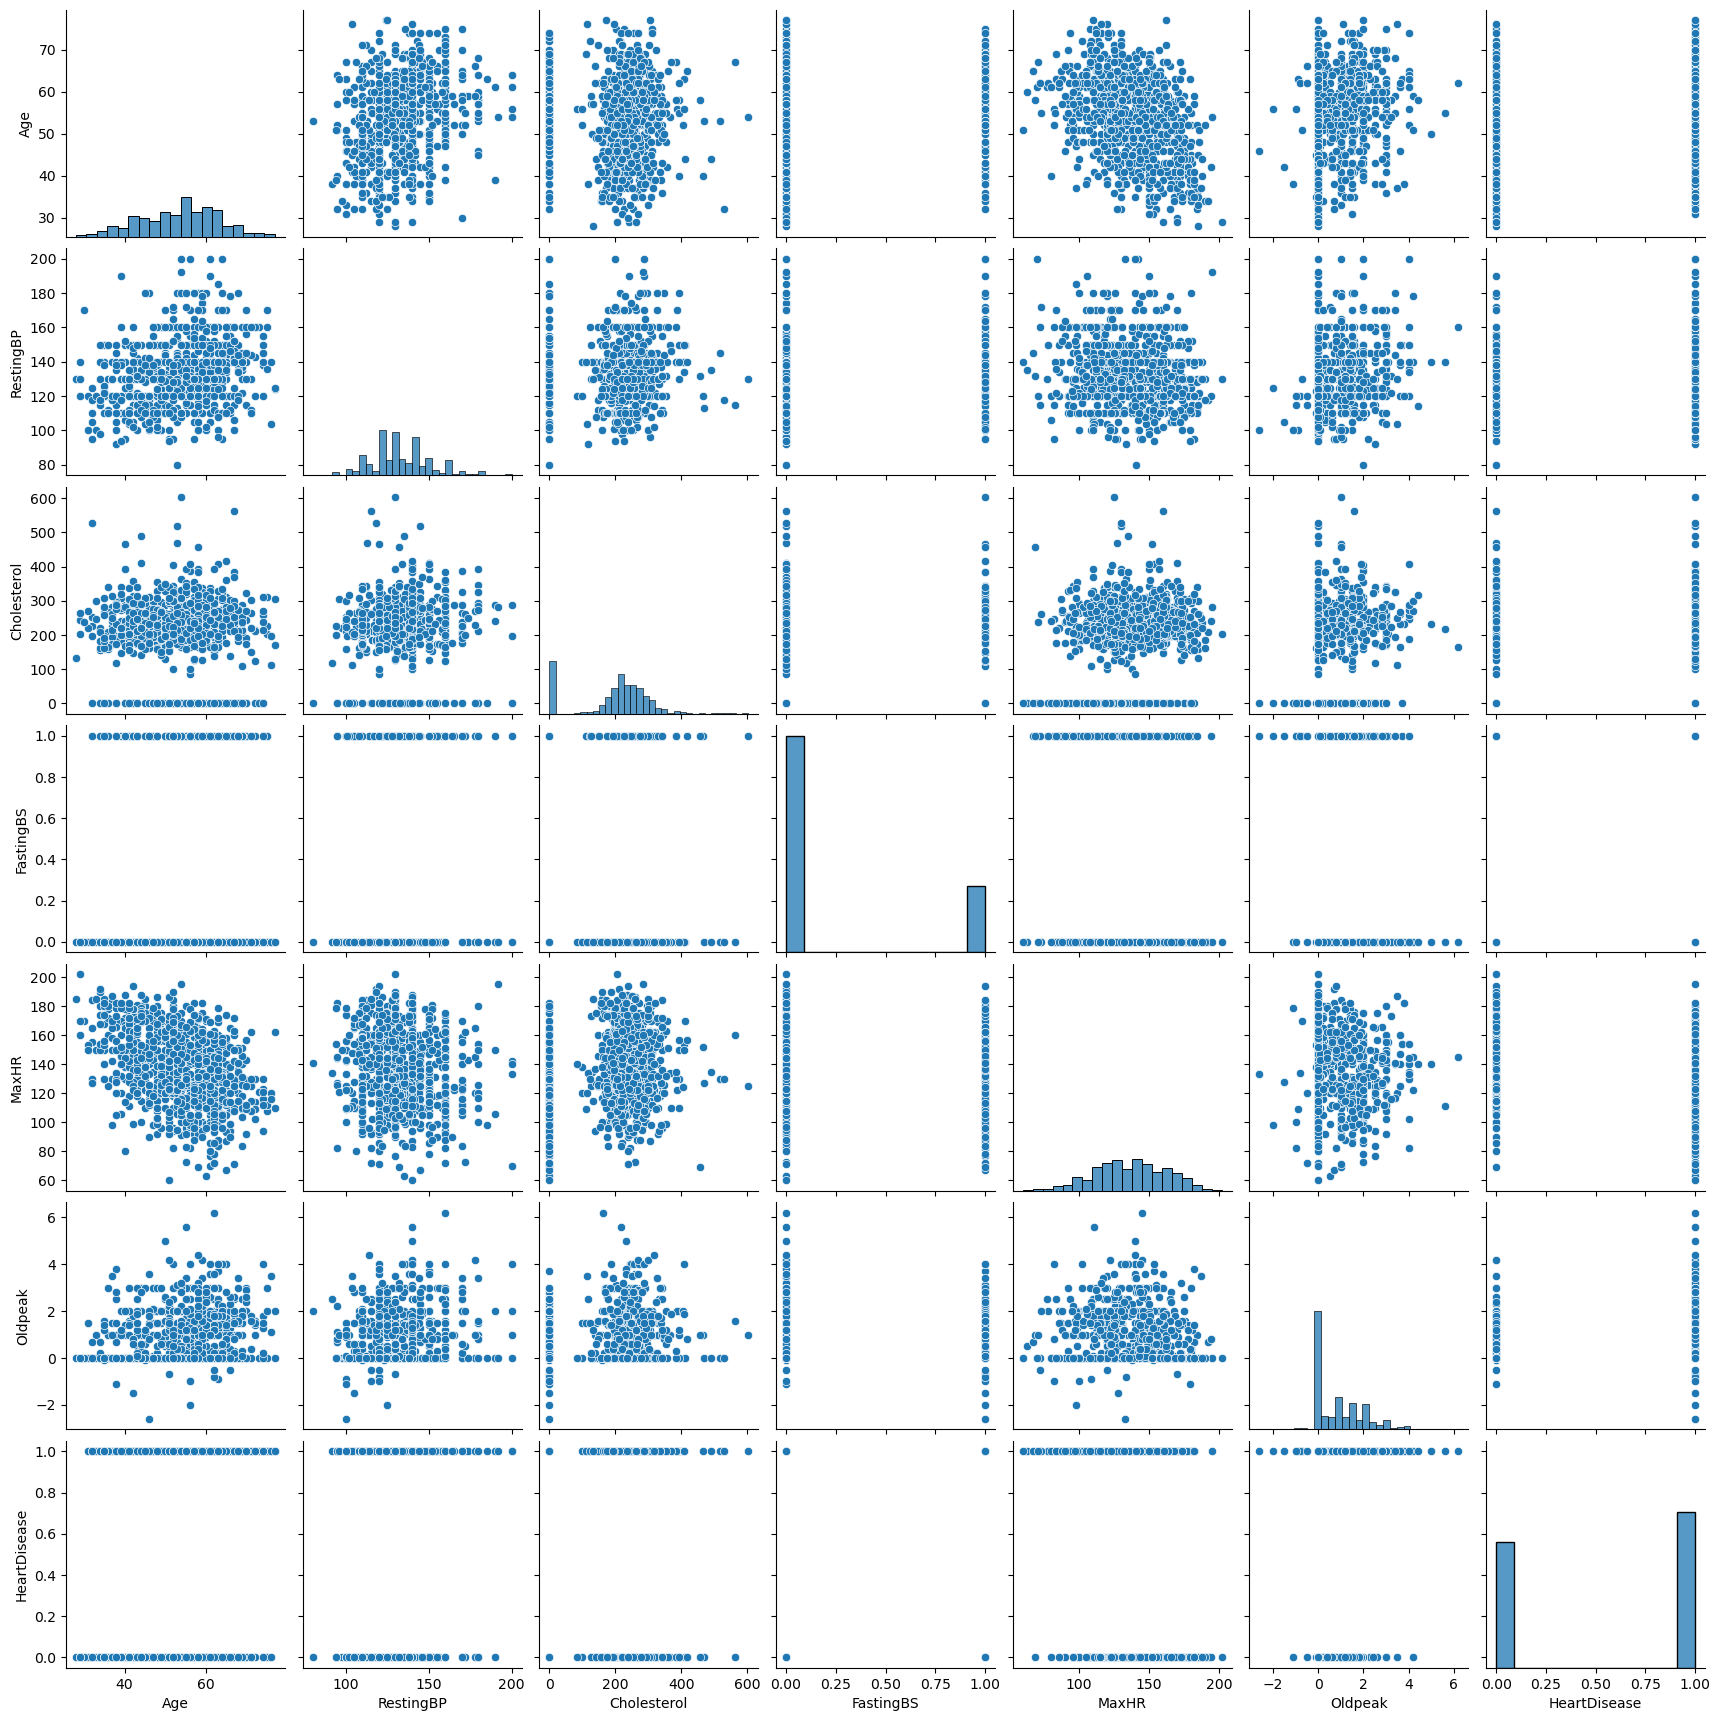

In [10]:
import seaborn as sns
sns.pairplot(df)

C:\Users\Hp\AnacondaFolder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



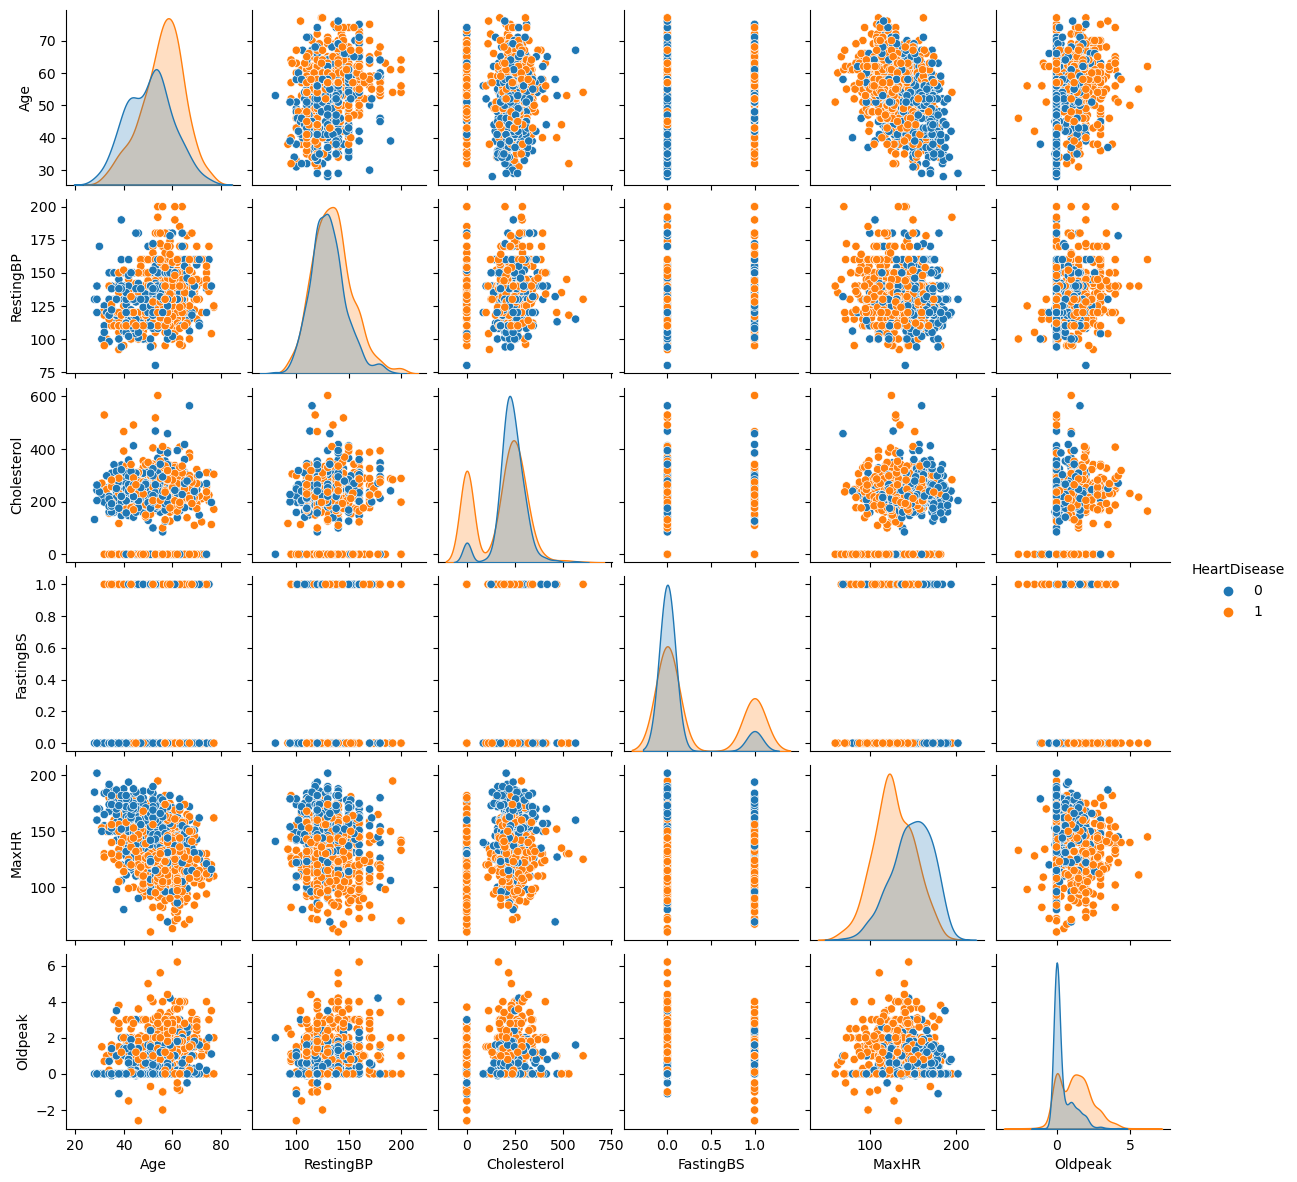

In [11]:
sns.pairplot(df, hue='HeartDisease', height=2)

In [12]:
def displot_bringer(x_axis_value):
    # first figure
    kde_all = sns.displot(data=df, x=x_axis_value, hue="HeartDisease", kind="kde", palette=["green", "red"], fill=True, legend=False
                         ,aspect=2)

    plt.suptitle(x_axis_value + " Distributions of Normal and Heart Disease People\n and Empirical Cumulative Distribution Functions", 
                 y=1.2, size=18, fontweight="bold")

    plt.legend(title='People', loc='upper left', labels=['Heart Disease', 'Normal'], bbox_to_anchor=(1.1, 0.7))

    # second figure
    kde = sns.displot(data=df, x=x_axis_value, hue="HeartDisease", col="Sex", kind="kde", palette=["green", "red"], fill=True, legend=False)

    plt.legend(title='People', loc='upper left', labels=['Heart Disease', 'Normal'], bbox_to_anchor=(1.1, 0.7))

    # third figure
    ecdf = sns.displot(
        data=df, x=x_axis_value, hue="HeartDisease", col="Sex",
        kind="ecdf", palette=["green", "red"], legend=False)

    plt.legend(title='People', loc='upper left', labels=['Heart Disease', 'Normal'], bbox_to_anchor=(1.1, 0.7))

    ax1, ax2 = ecdf.axes[0]
    ax1.hlines(y=0.5, xmin=0, xmax=df[x_axis_value].max(), linewidth=1.2, linestyles ="dashed", color='k')
    ax1.hlines(y=0.8, xmin=0, xmax=df[x_axis_value].max(), linewidth=1.2, linestyles ="dashed", color='k')
    ax1.hlines(y=0.2, xmin=0, xmax=df[x_axis_value].max(), linewidth=1.2, linestyles ="dashed", color='k')
    ax2.hlines(y=0.5, xmin=0, xmax=df[x_axis_value].max(), linewidth=1.2, linestyles ="dashed", color='k')
    ax2.hlines(y=0.8, xmin=0, xmax=df[x_axis_value].max(), linewidth=1.2, linestyles ="dashed", color='k')
    ax2.hlines(y=0.2, xmin=0, xmax=df[x_axis_value].max(), linewidth=1.2, linestyles ="dashed", color='k')


    ax1.vlines(df.loc[(df['Sex'] == "M") & (df['HeartDisease'] == 1)][x_axis_value].quantile(0.20)
               , 0, 0.2, linewidth=1, linestyles ="dashed", colors ="red")

    ax1.vlines(df.loc[(df['Sex'] == "M") & (df['HeartDisease'] == 1)][x_axis_value].quantile(0.80)
               , 0, 0.8, linewidth=1, linestyles ="dashed", colors ="red")

    ax1.vlines(df.loc[(df['Sex'] == "M") & (df['HeartDisease'] == 0)][x_axis_value].quantile(0.20)
               , 0, 0.2, linewidth=1, linestyles ="dashed", colors ="green")

    ax1.vlines(df.loc[(df['Sex'] == "M") & (df['HeartDisease'] == 0)][x_axis_value].quantile(0.80)
               , 0, 0.8, linewidth=1, linestyles ="dashed", colors ="green")

    ax2.vlines(df.loc[(df['Sex'] == "F") & (df['HeartDisease'] == 1)][x_axis_value].quantile(0.20)
              , 0, 0.2, linewidth=1, linestyles ="dashed", colors ="red")

    ax2.vlines(df.loc[(df['Sex'] == "F") & (df['HeartDisease'] == 1)][x_axis_value].quantile(0.80)
              , 0, 0.8, linewidth=1, linestyles ="dashed", colors ="red")

    ax2.vlines(df.loc[(df['Sex'] == "F") & (df['HeartDisease'] == 0)][x_axis_value].quantile(0.20)
              , 0, 0.2, linewidth=1, linestyles ="dashed", colors ="green")

    ax2.vlines(df.loc[(df['Sex'] == "F") & (df['HeartDisease'] == 0)][x_axis_value].quantile(0.80)
              , 0, 0.8, linewidth=1, linestyles ="dashed", colors ="green")


    ax1.axhspan(0.2, 0.8 ,alpha=.1, facecolor='lightskyblue',hatch=".", linewidth=2, linestyle="--", edgecolor="red")
    ax2.axhspan(0.2, 0.8 ,alpha=.1, facecolor='lightskyblue',hatch=".", linewidth=2, linestyle="--", edgecolor="red")

    kde_all.fig.set_dpi(300)
    kde.fig.set_dpi(300)
    ecdf.fig.set_dpi(300)

C:\Users\Hp\AnacondaFolder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\Hp\AnacondaFolder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\Hp\AnacondaFolder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



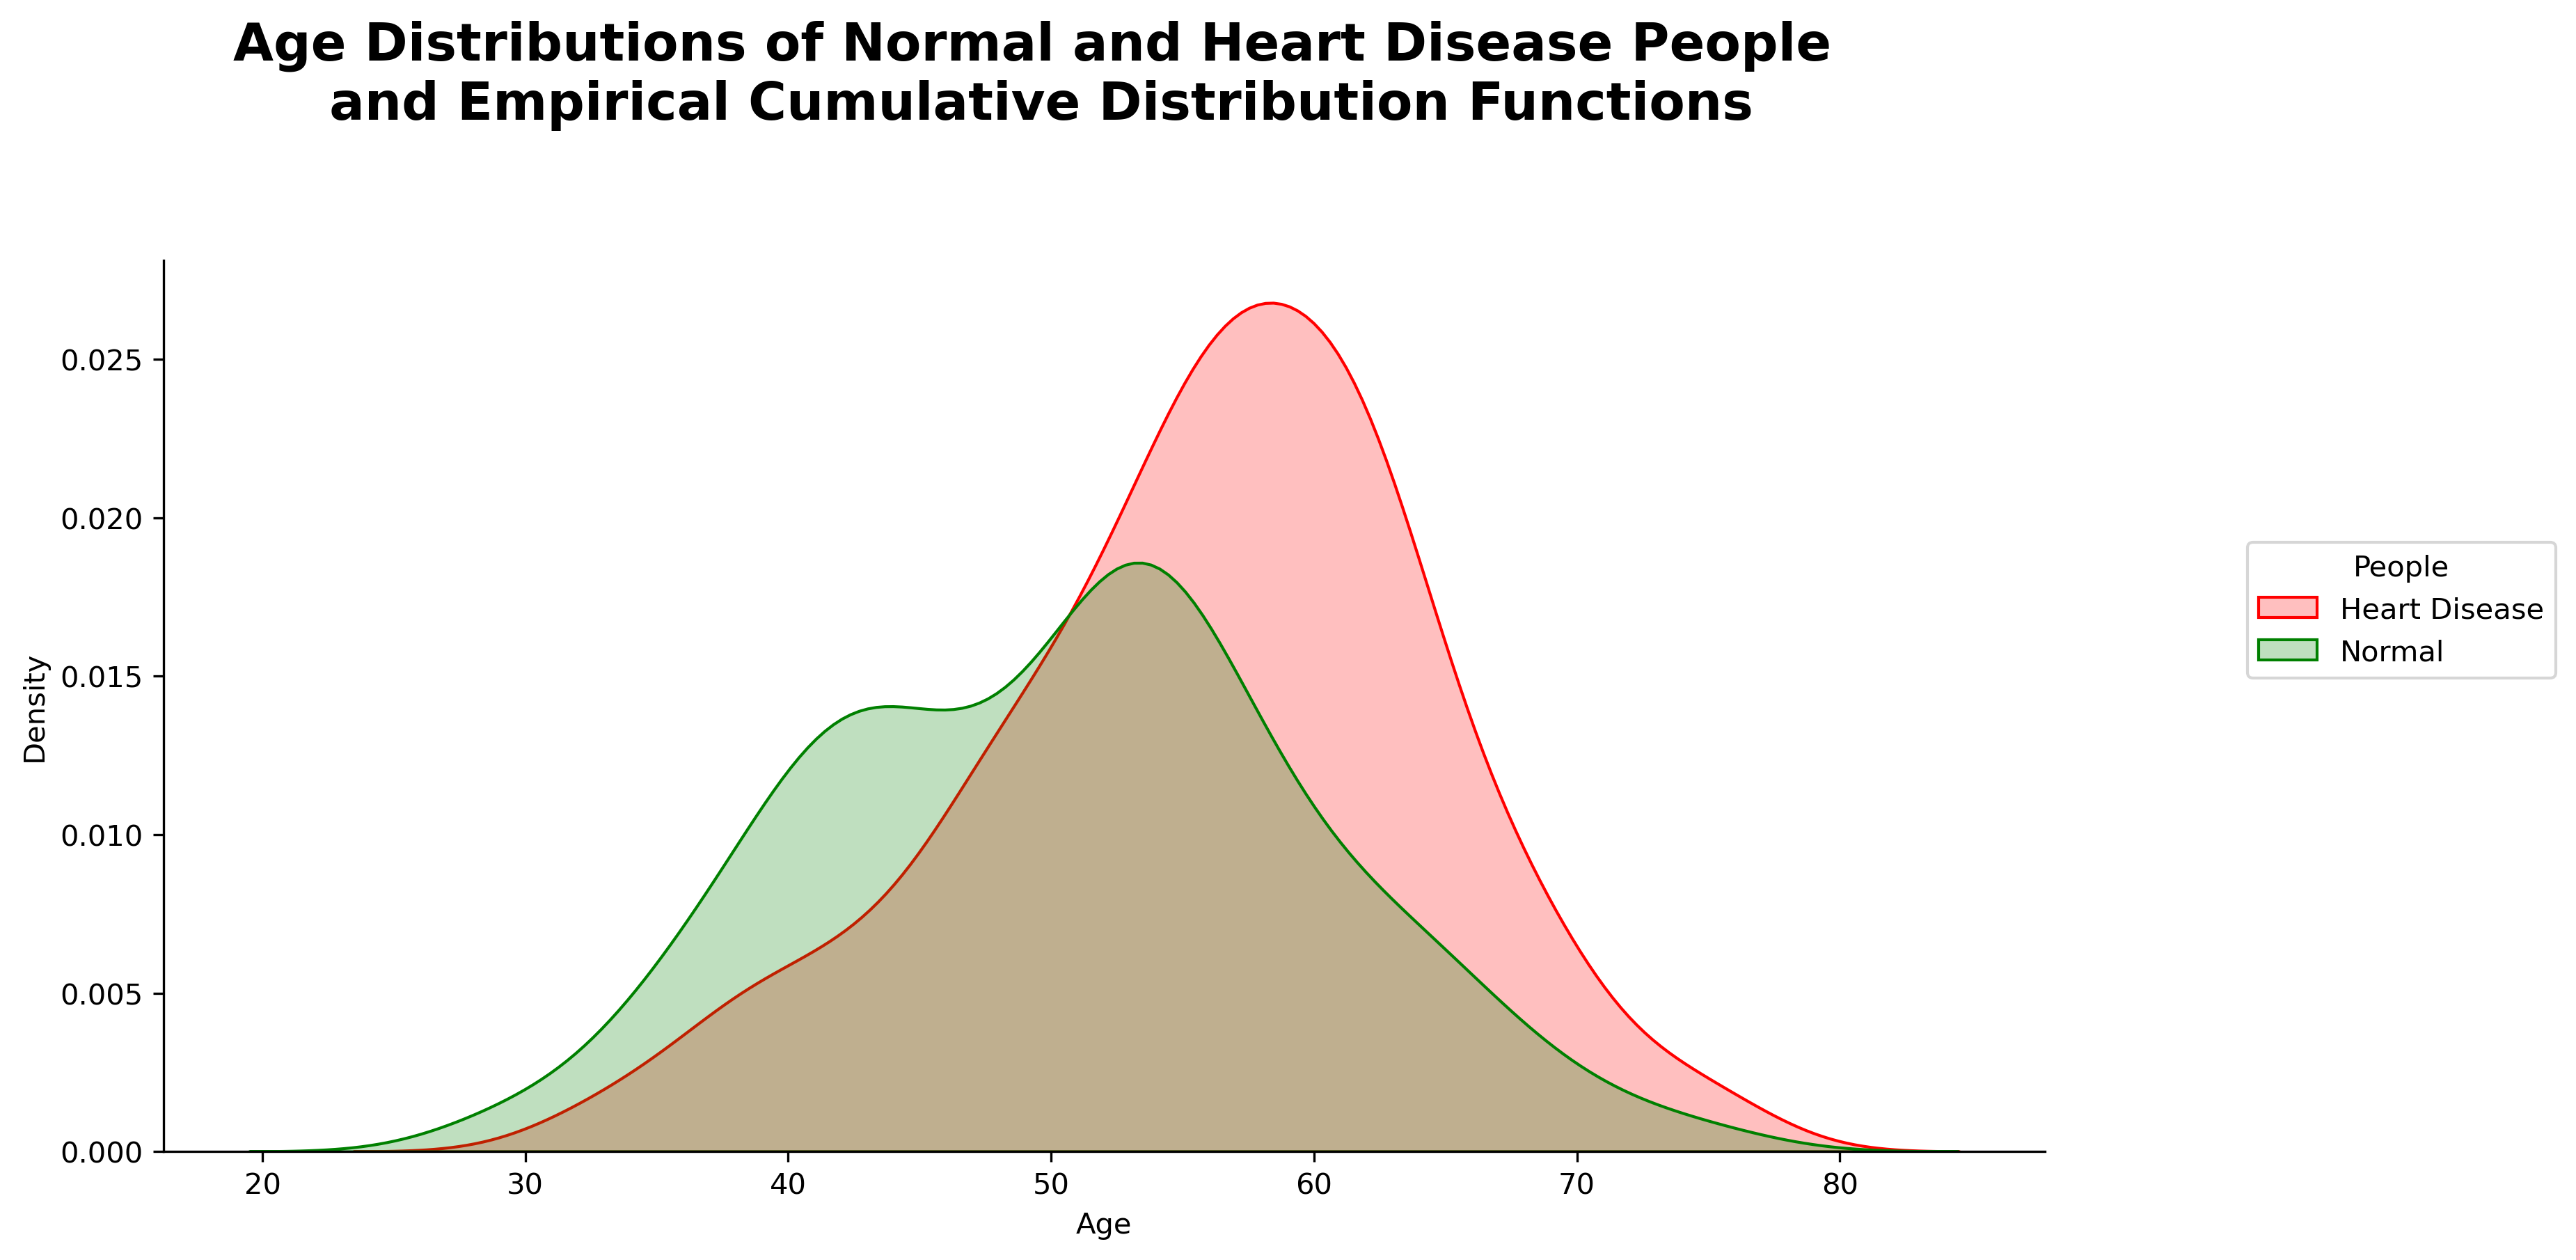

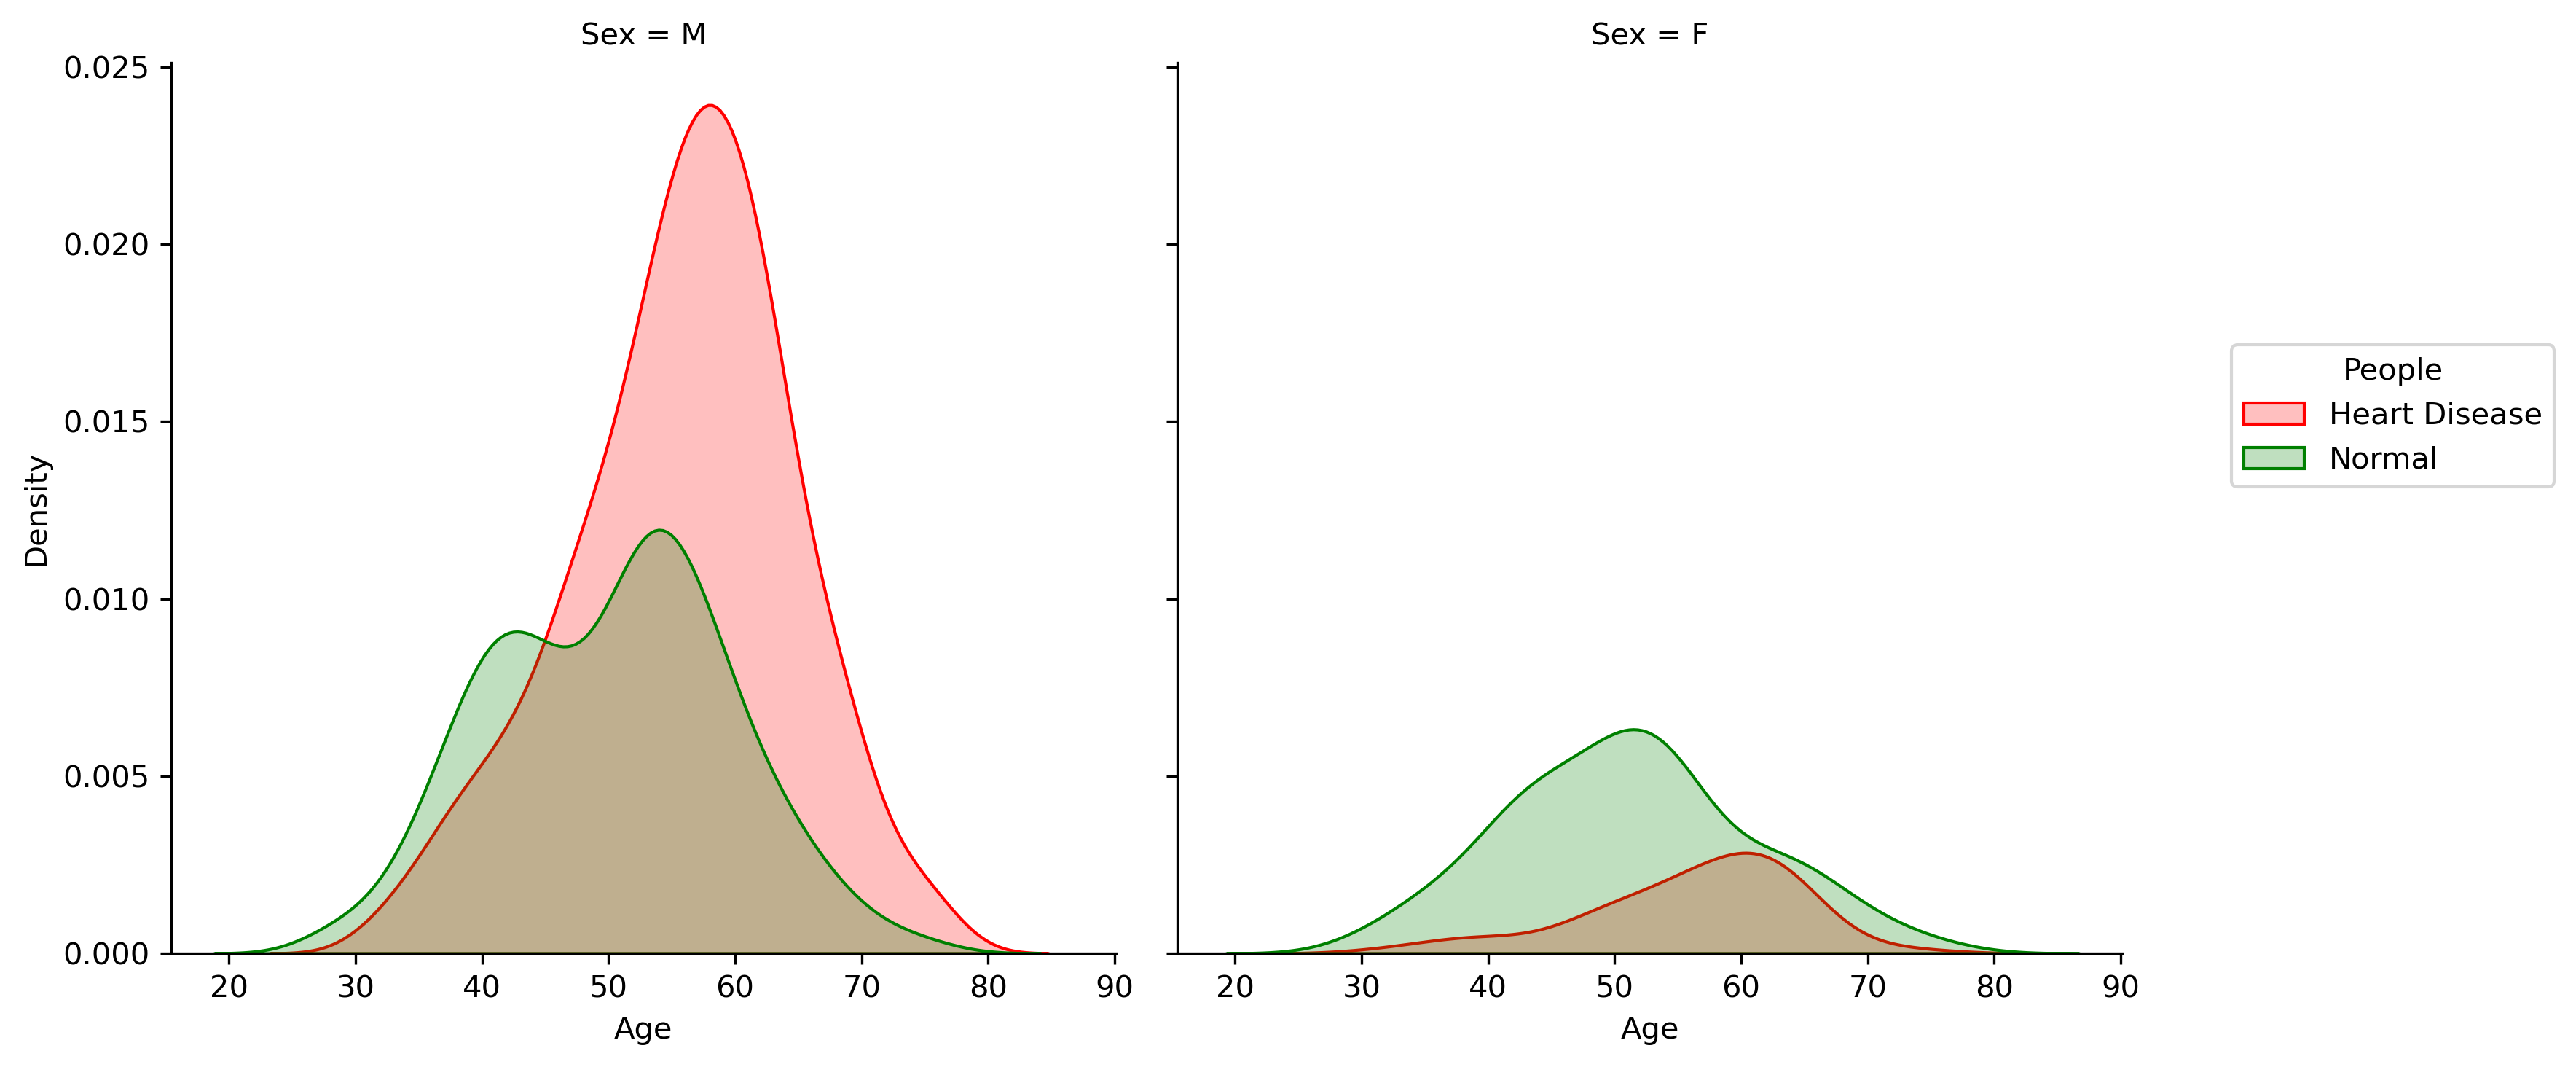

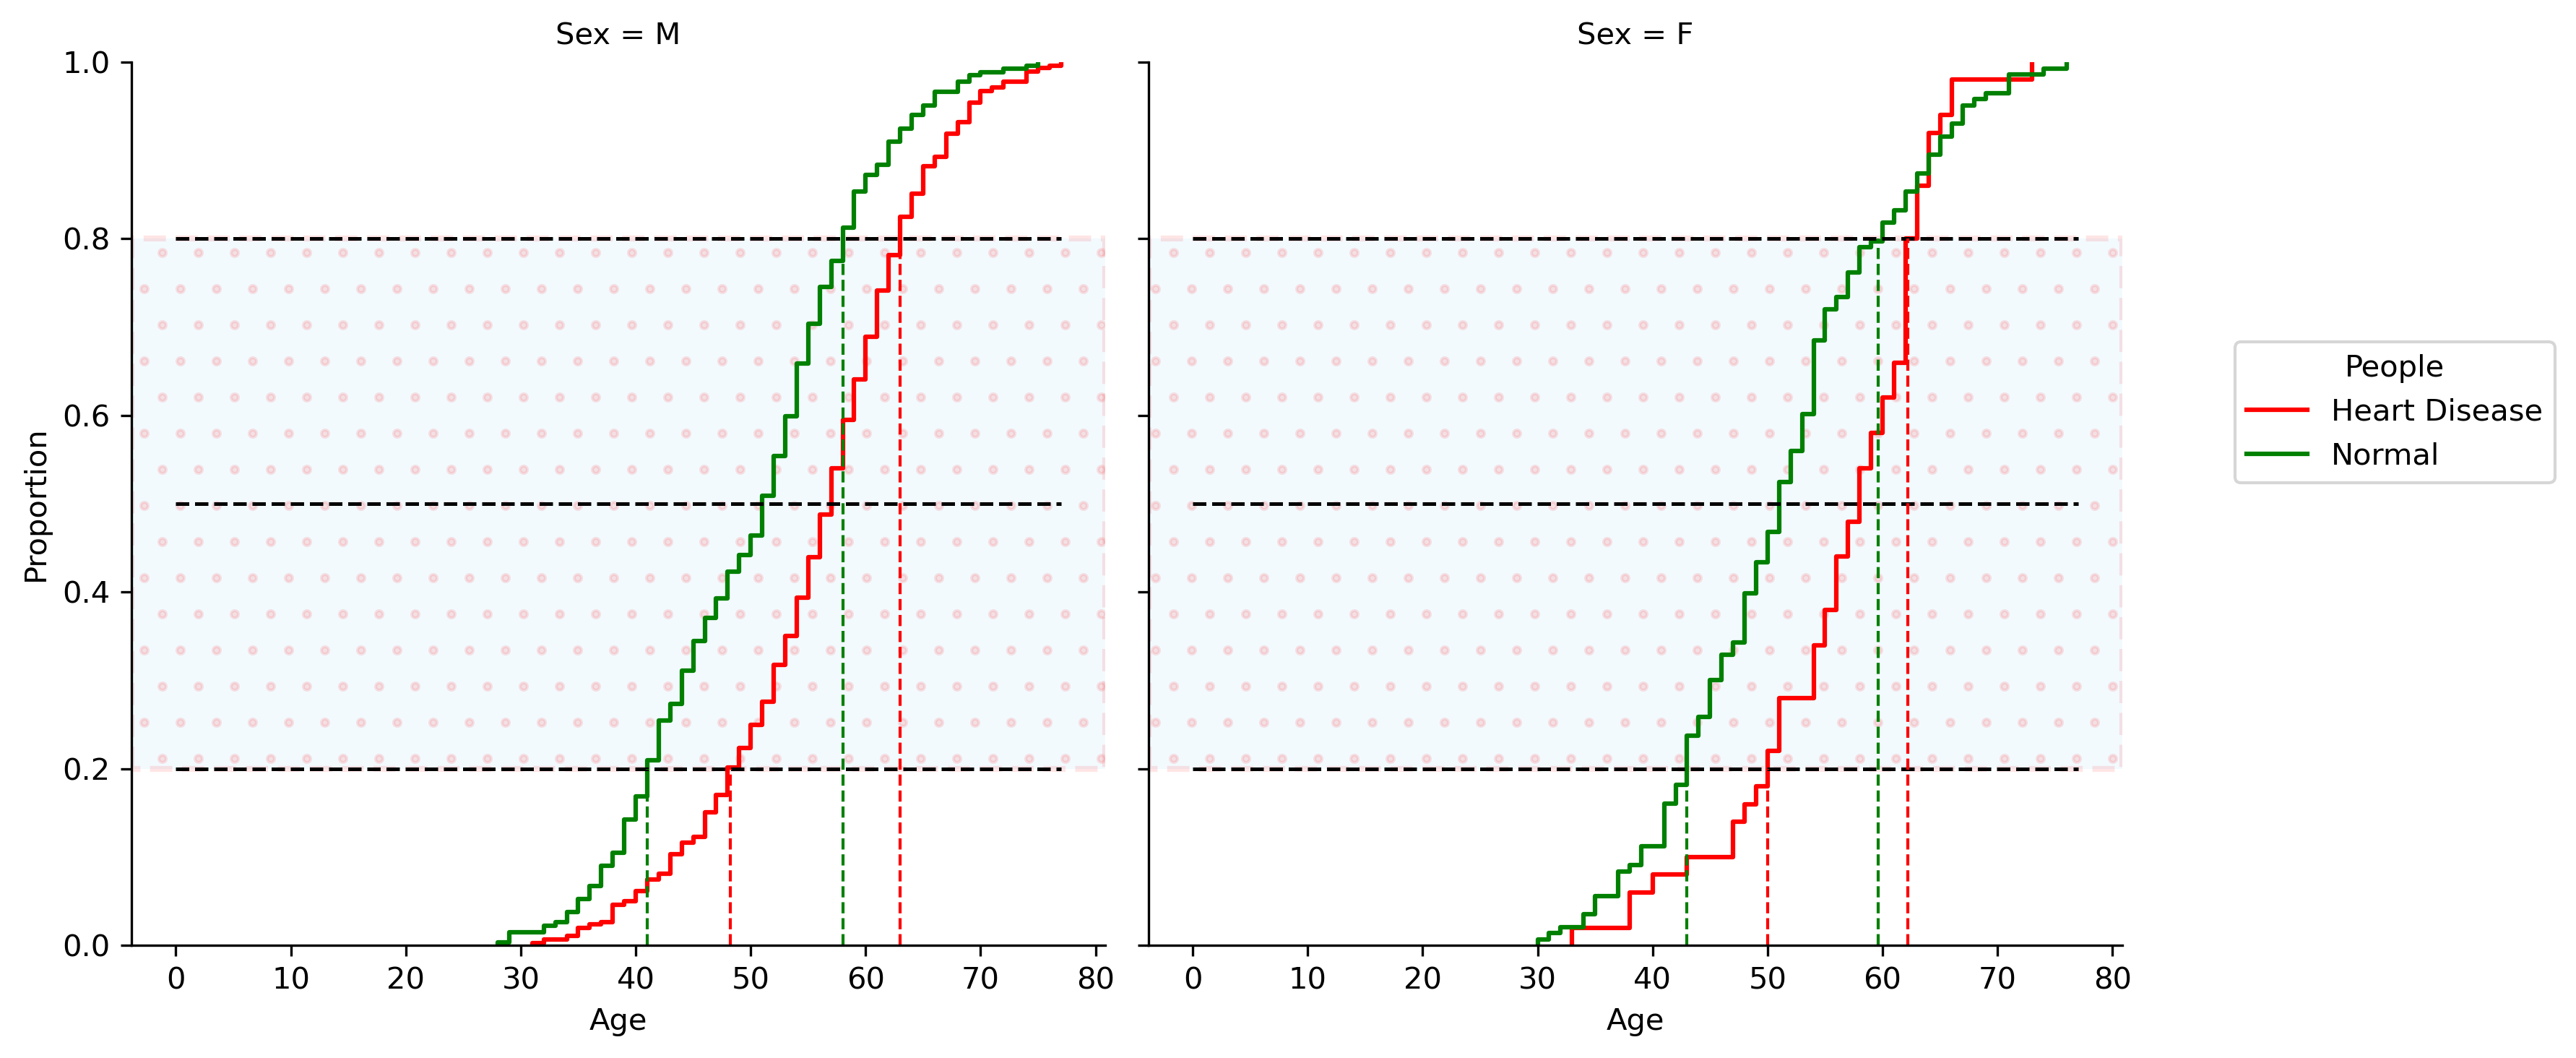

In [13]:
displot_bringer("Age")

C:\Users\Hp\AnacondaFolder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\Hp\AnacondaFolder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\Hp\AnacondaFolder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



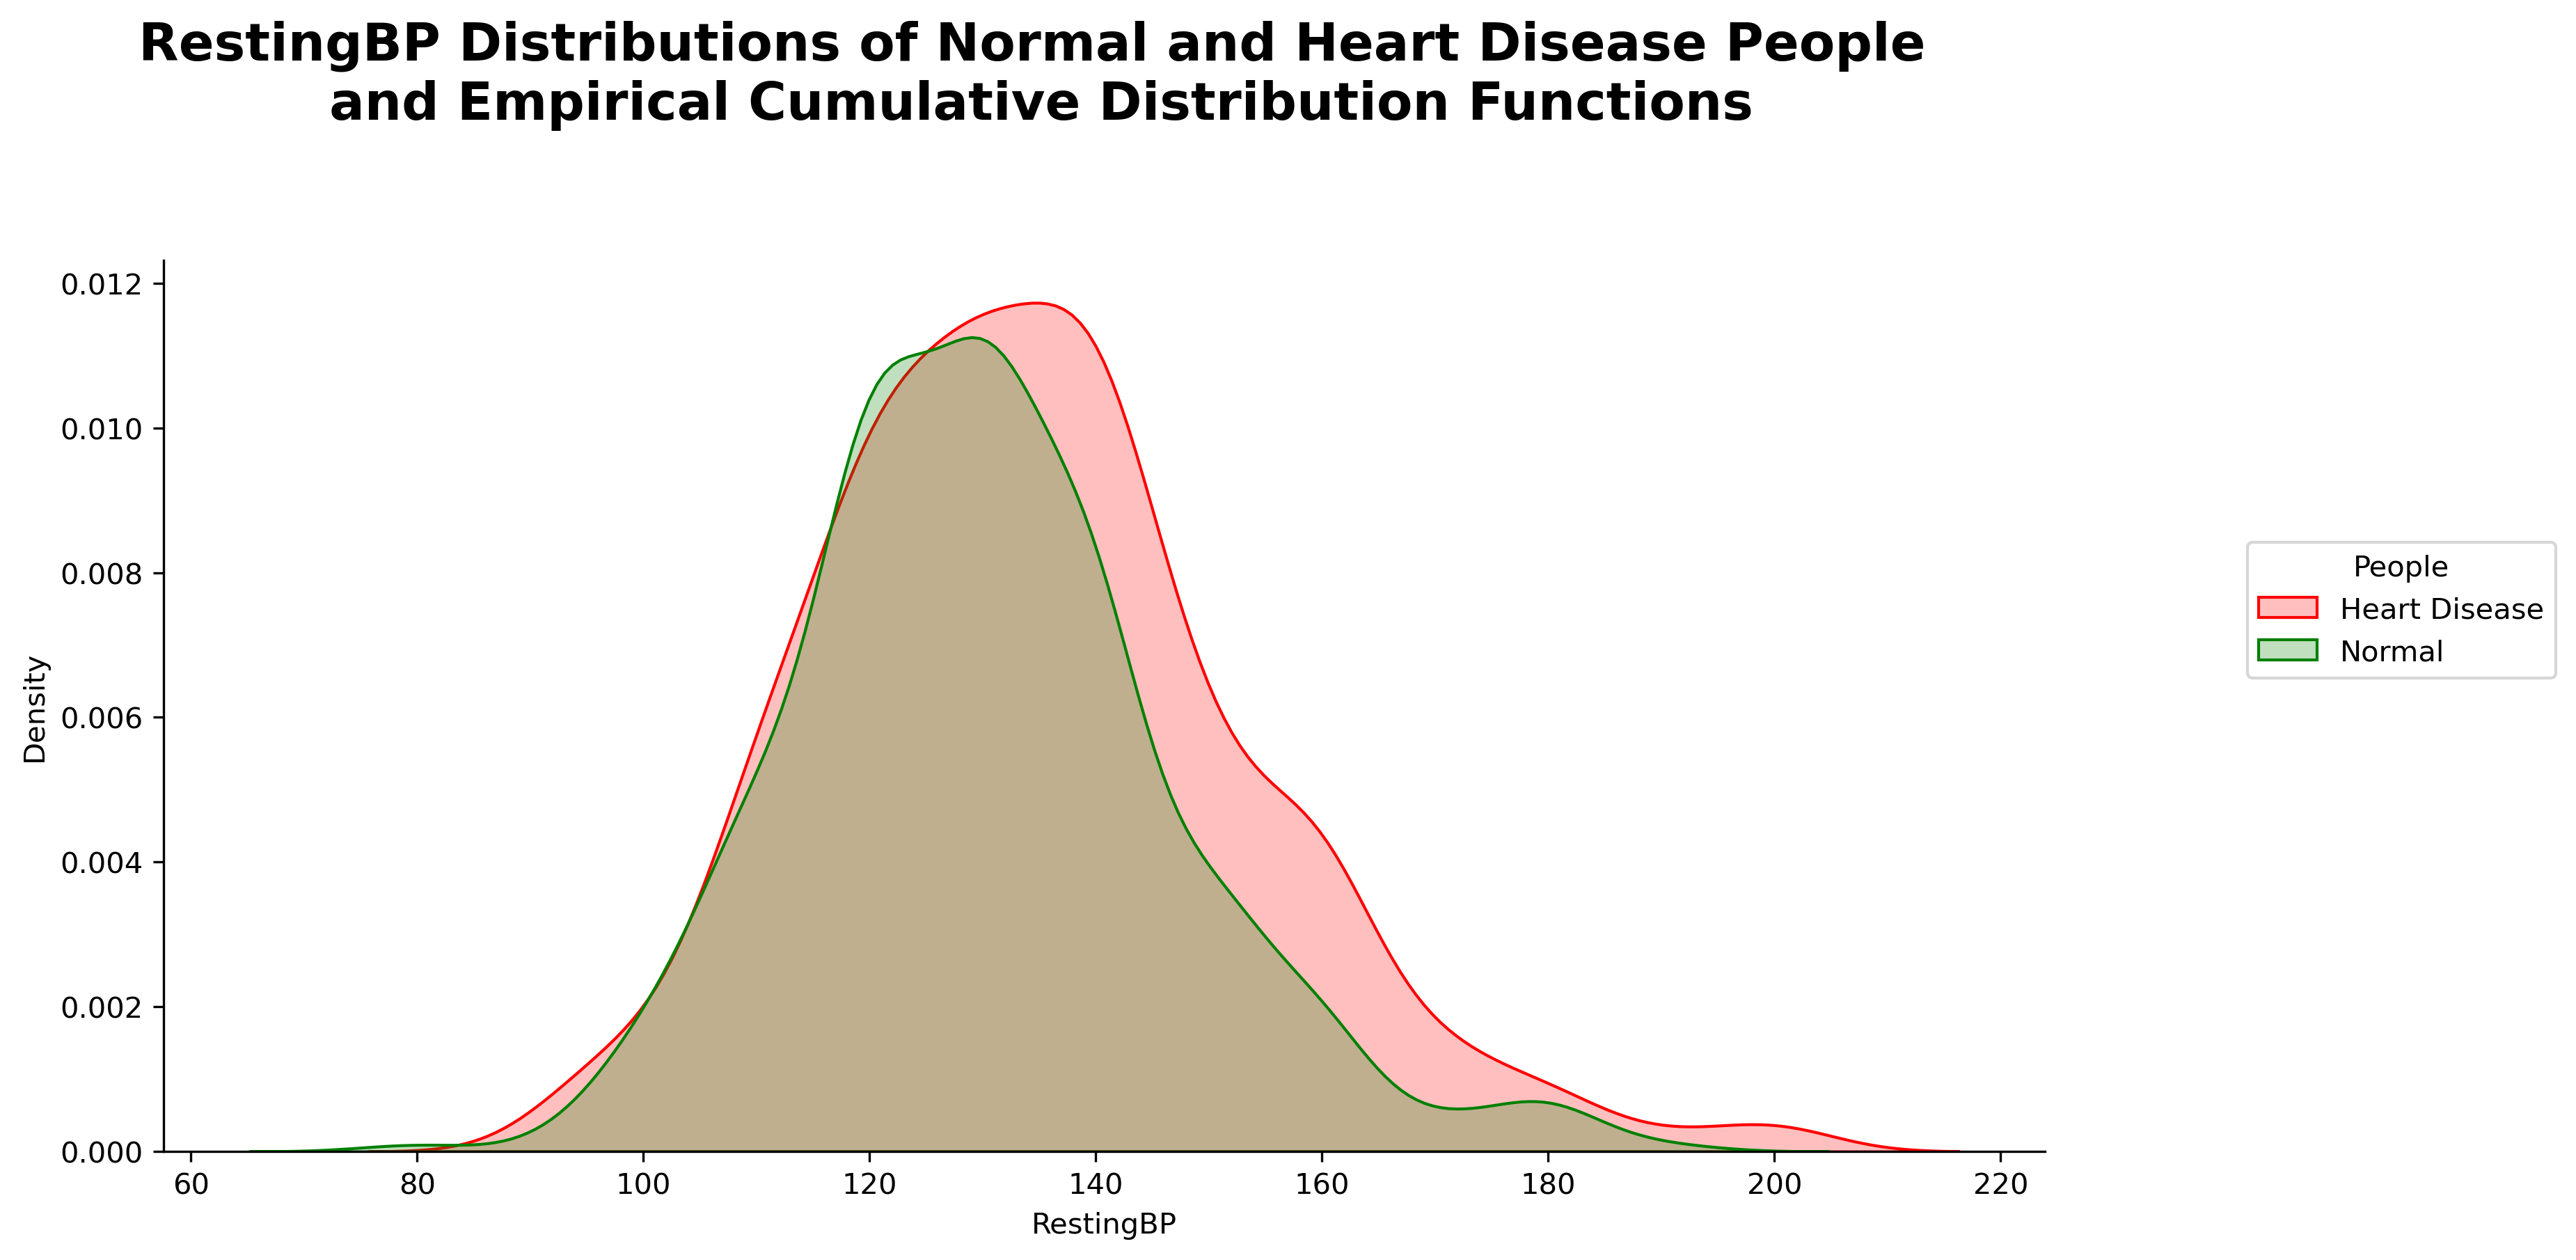

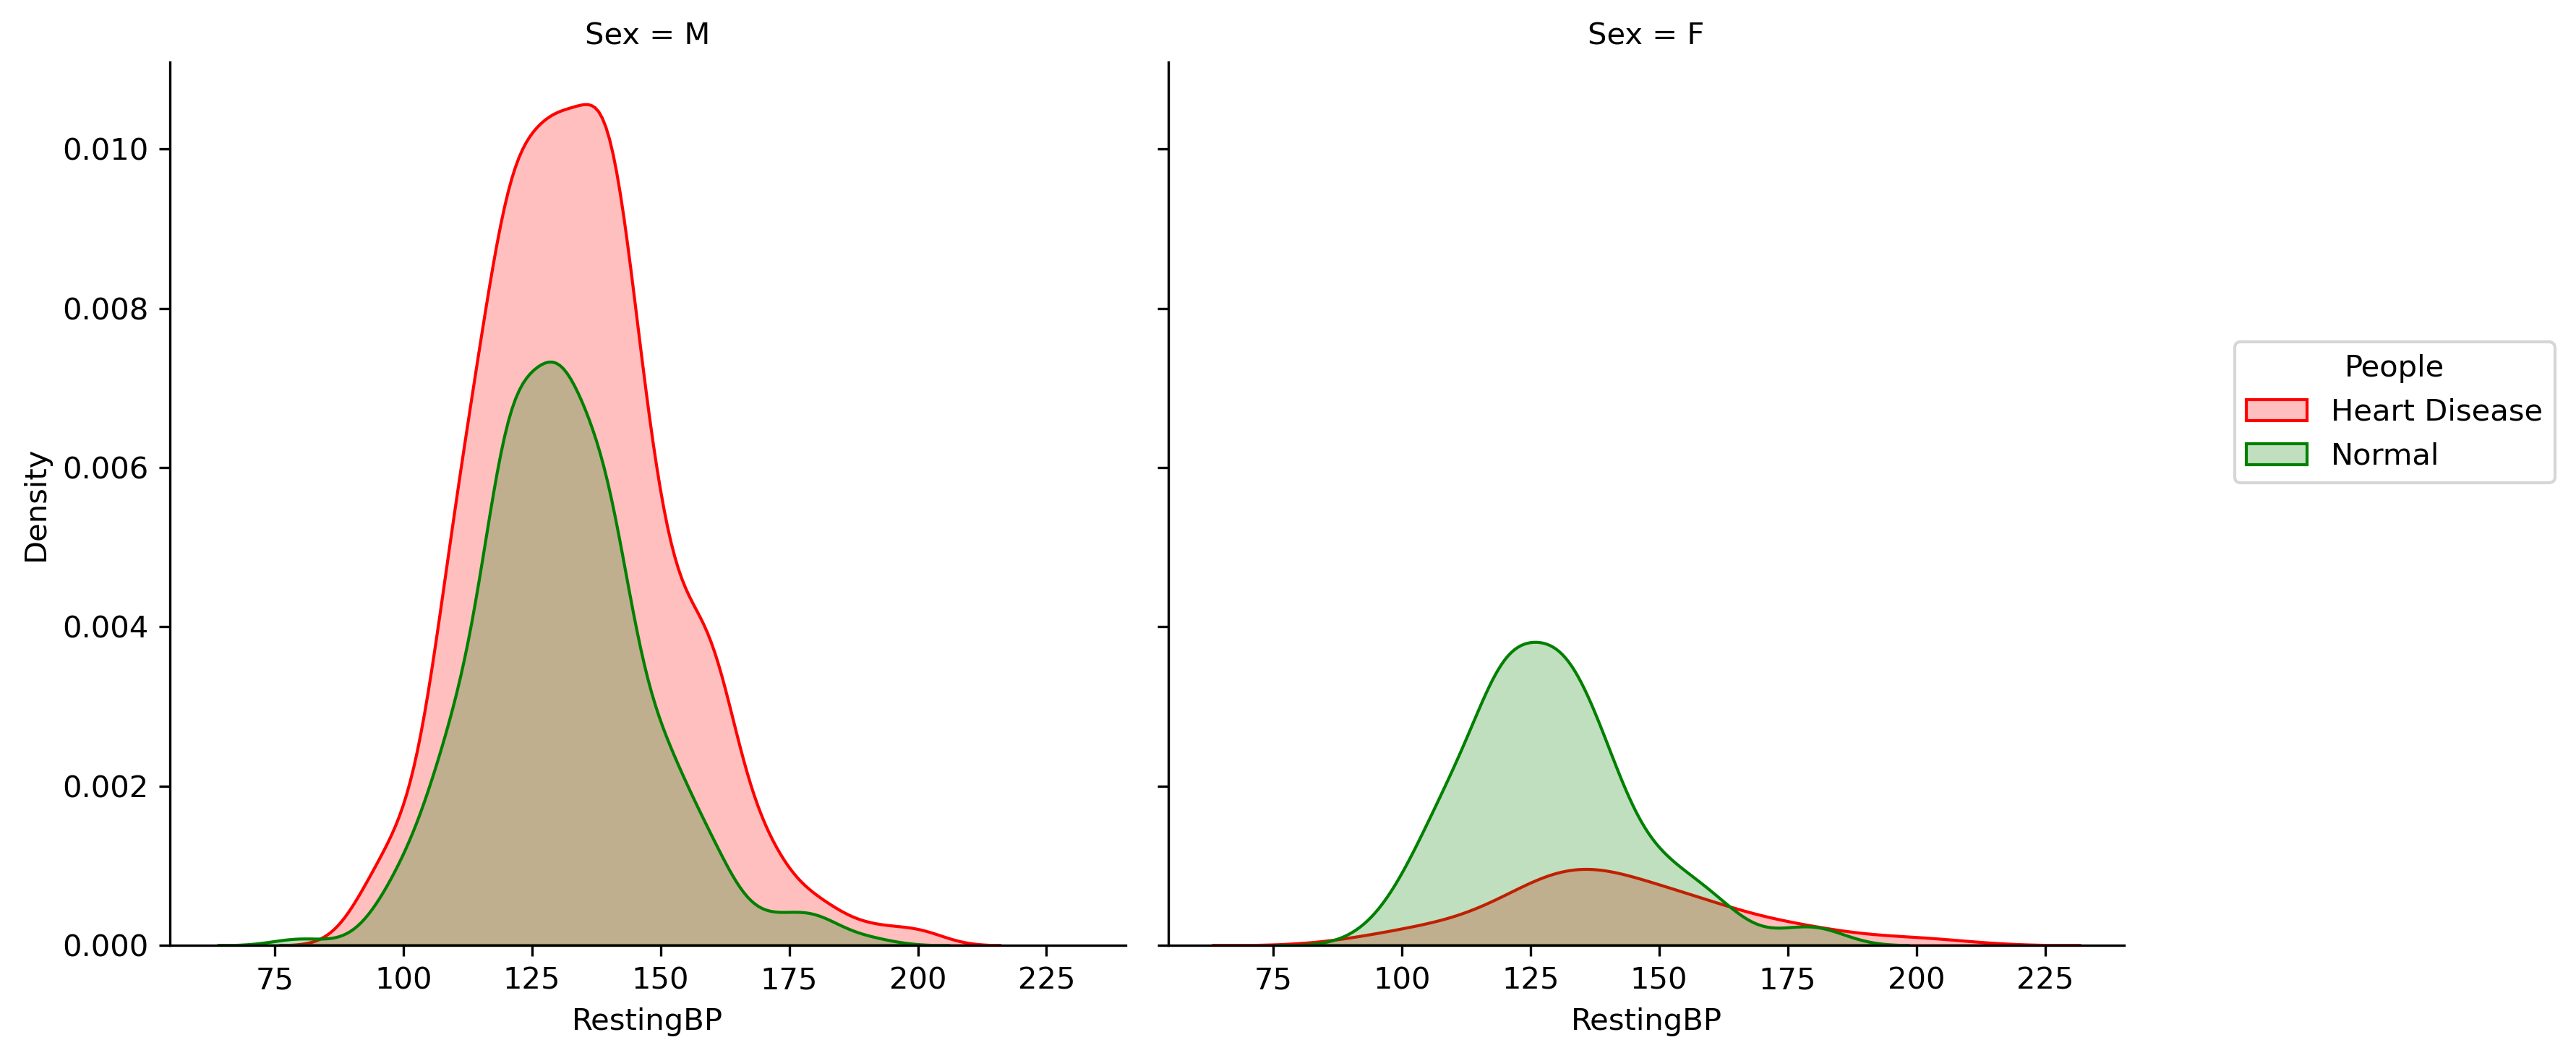

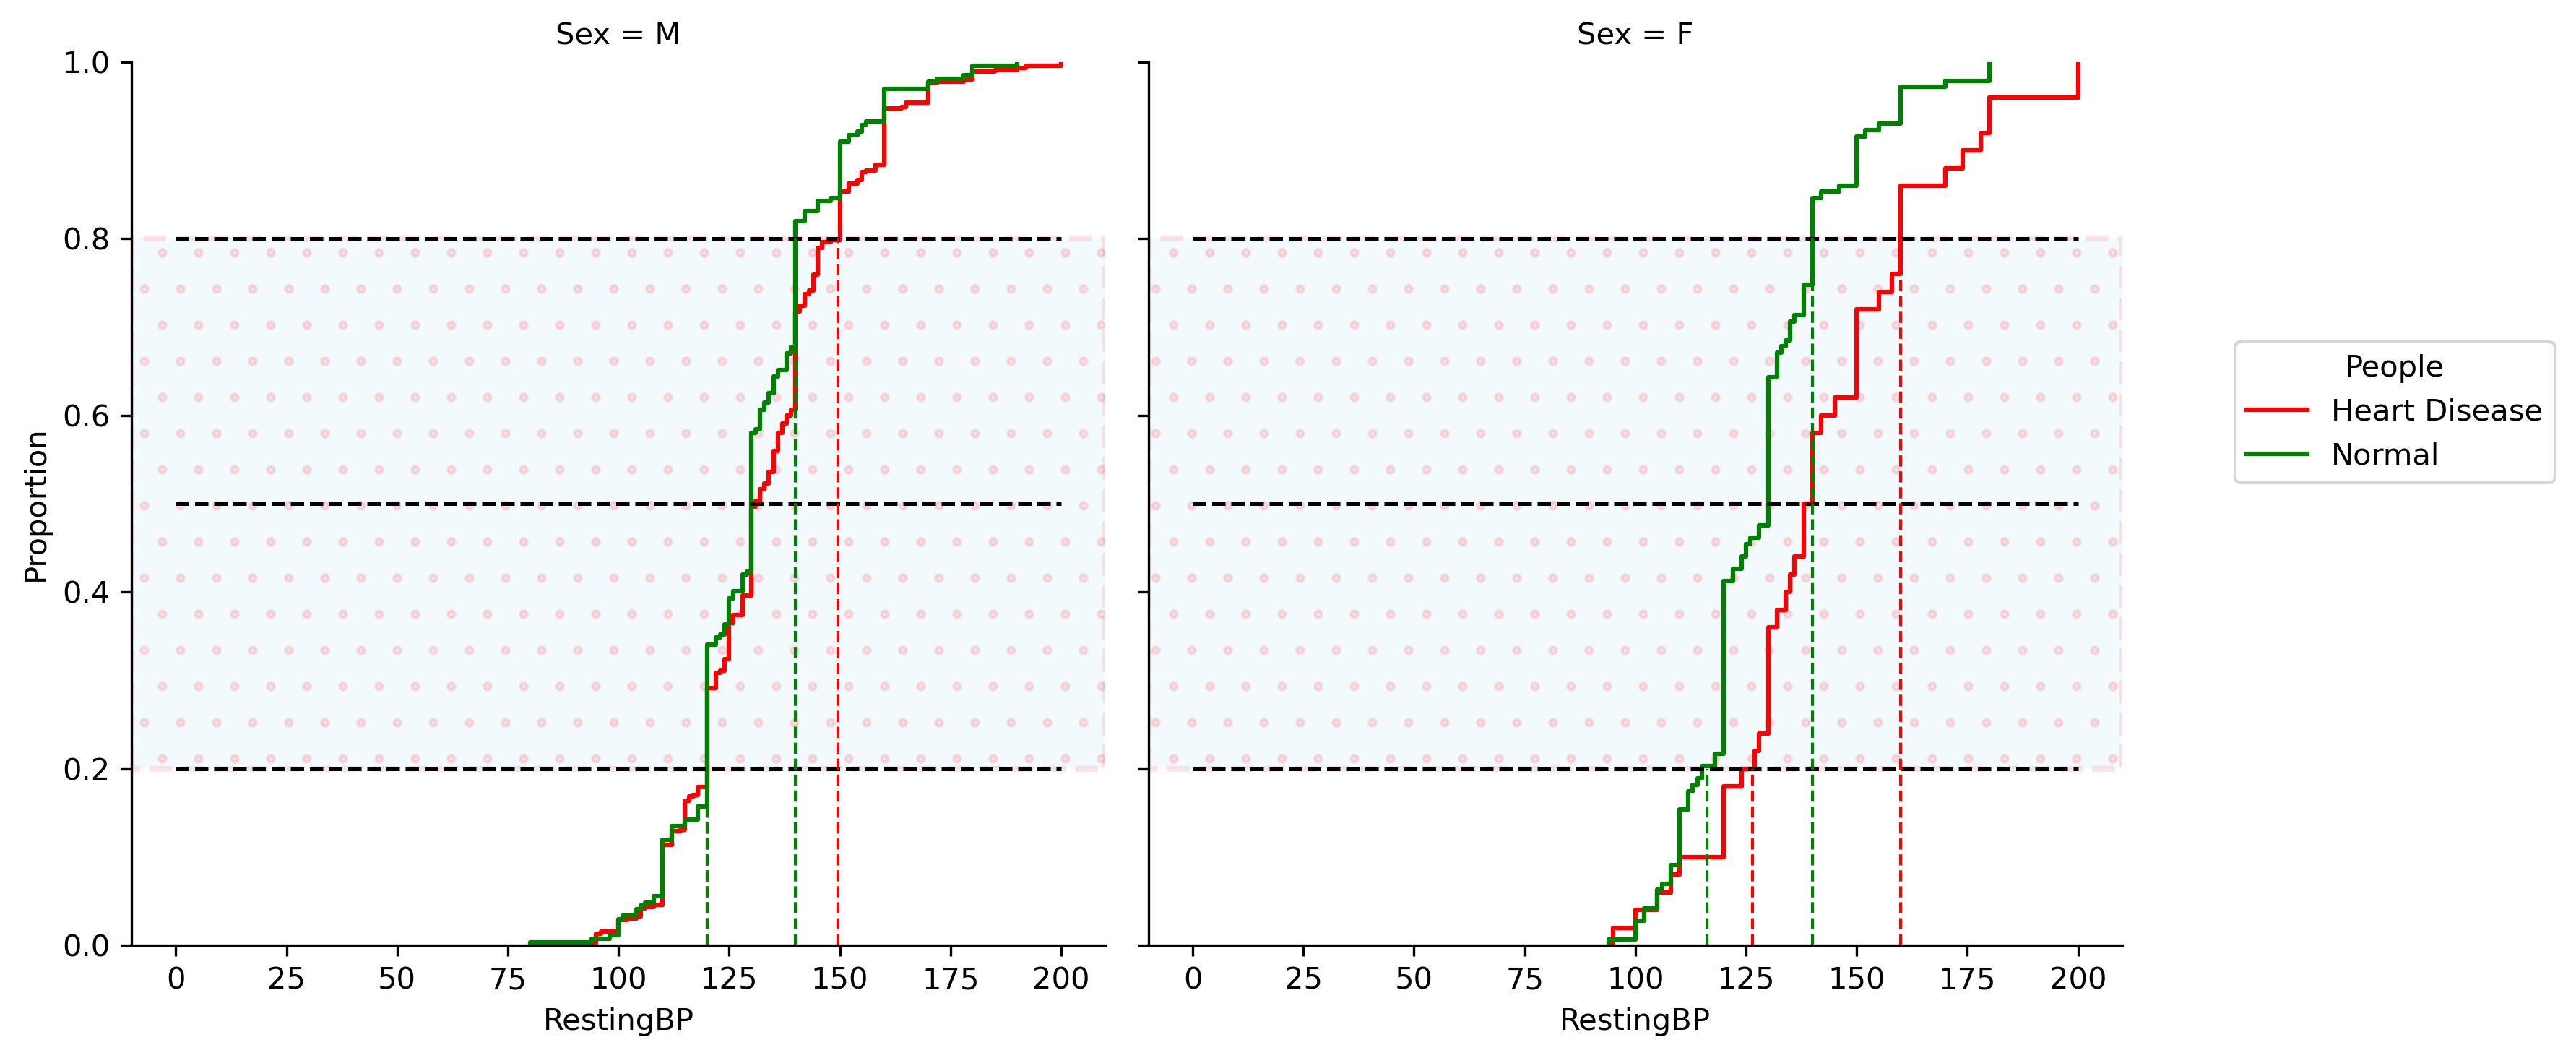

In [14]:
displot_bringer("RestingBP")

Text(0.5, 1.0, 'RestingECG for Normal and Heart Diseased People')

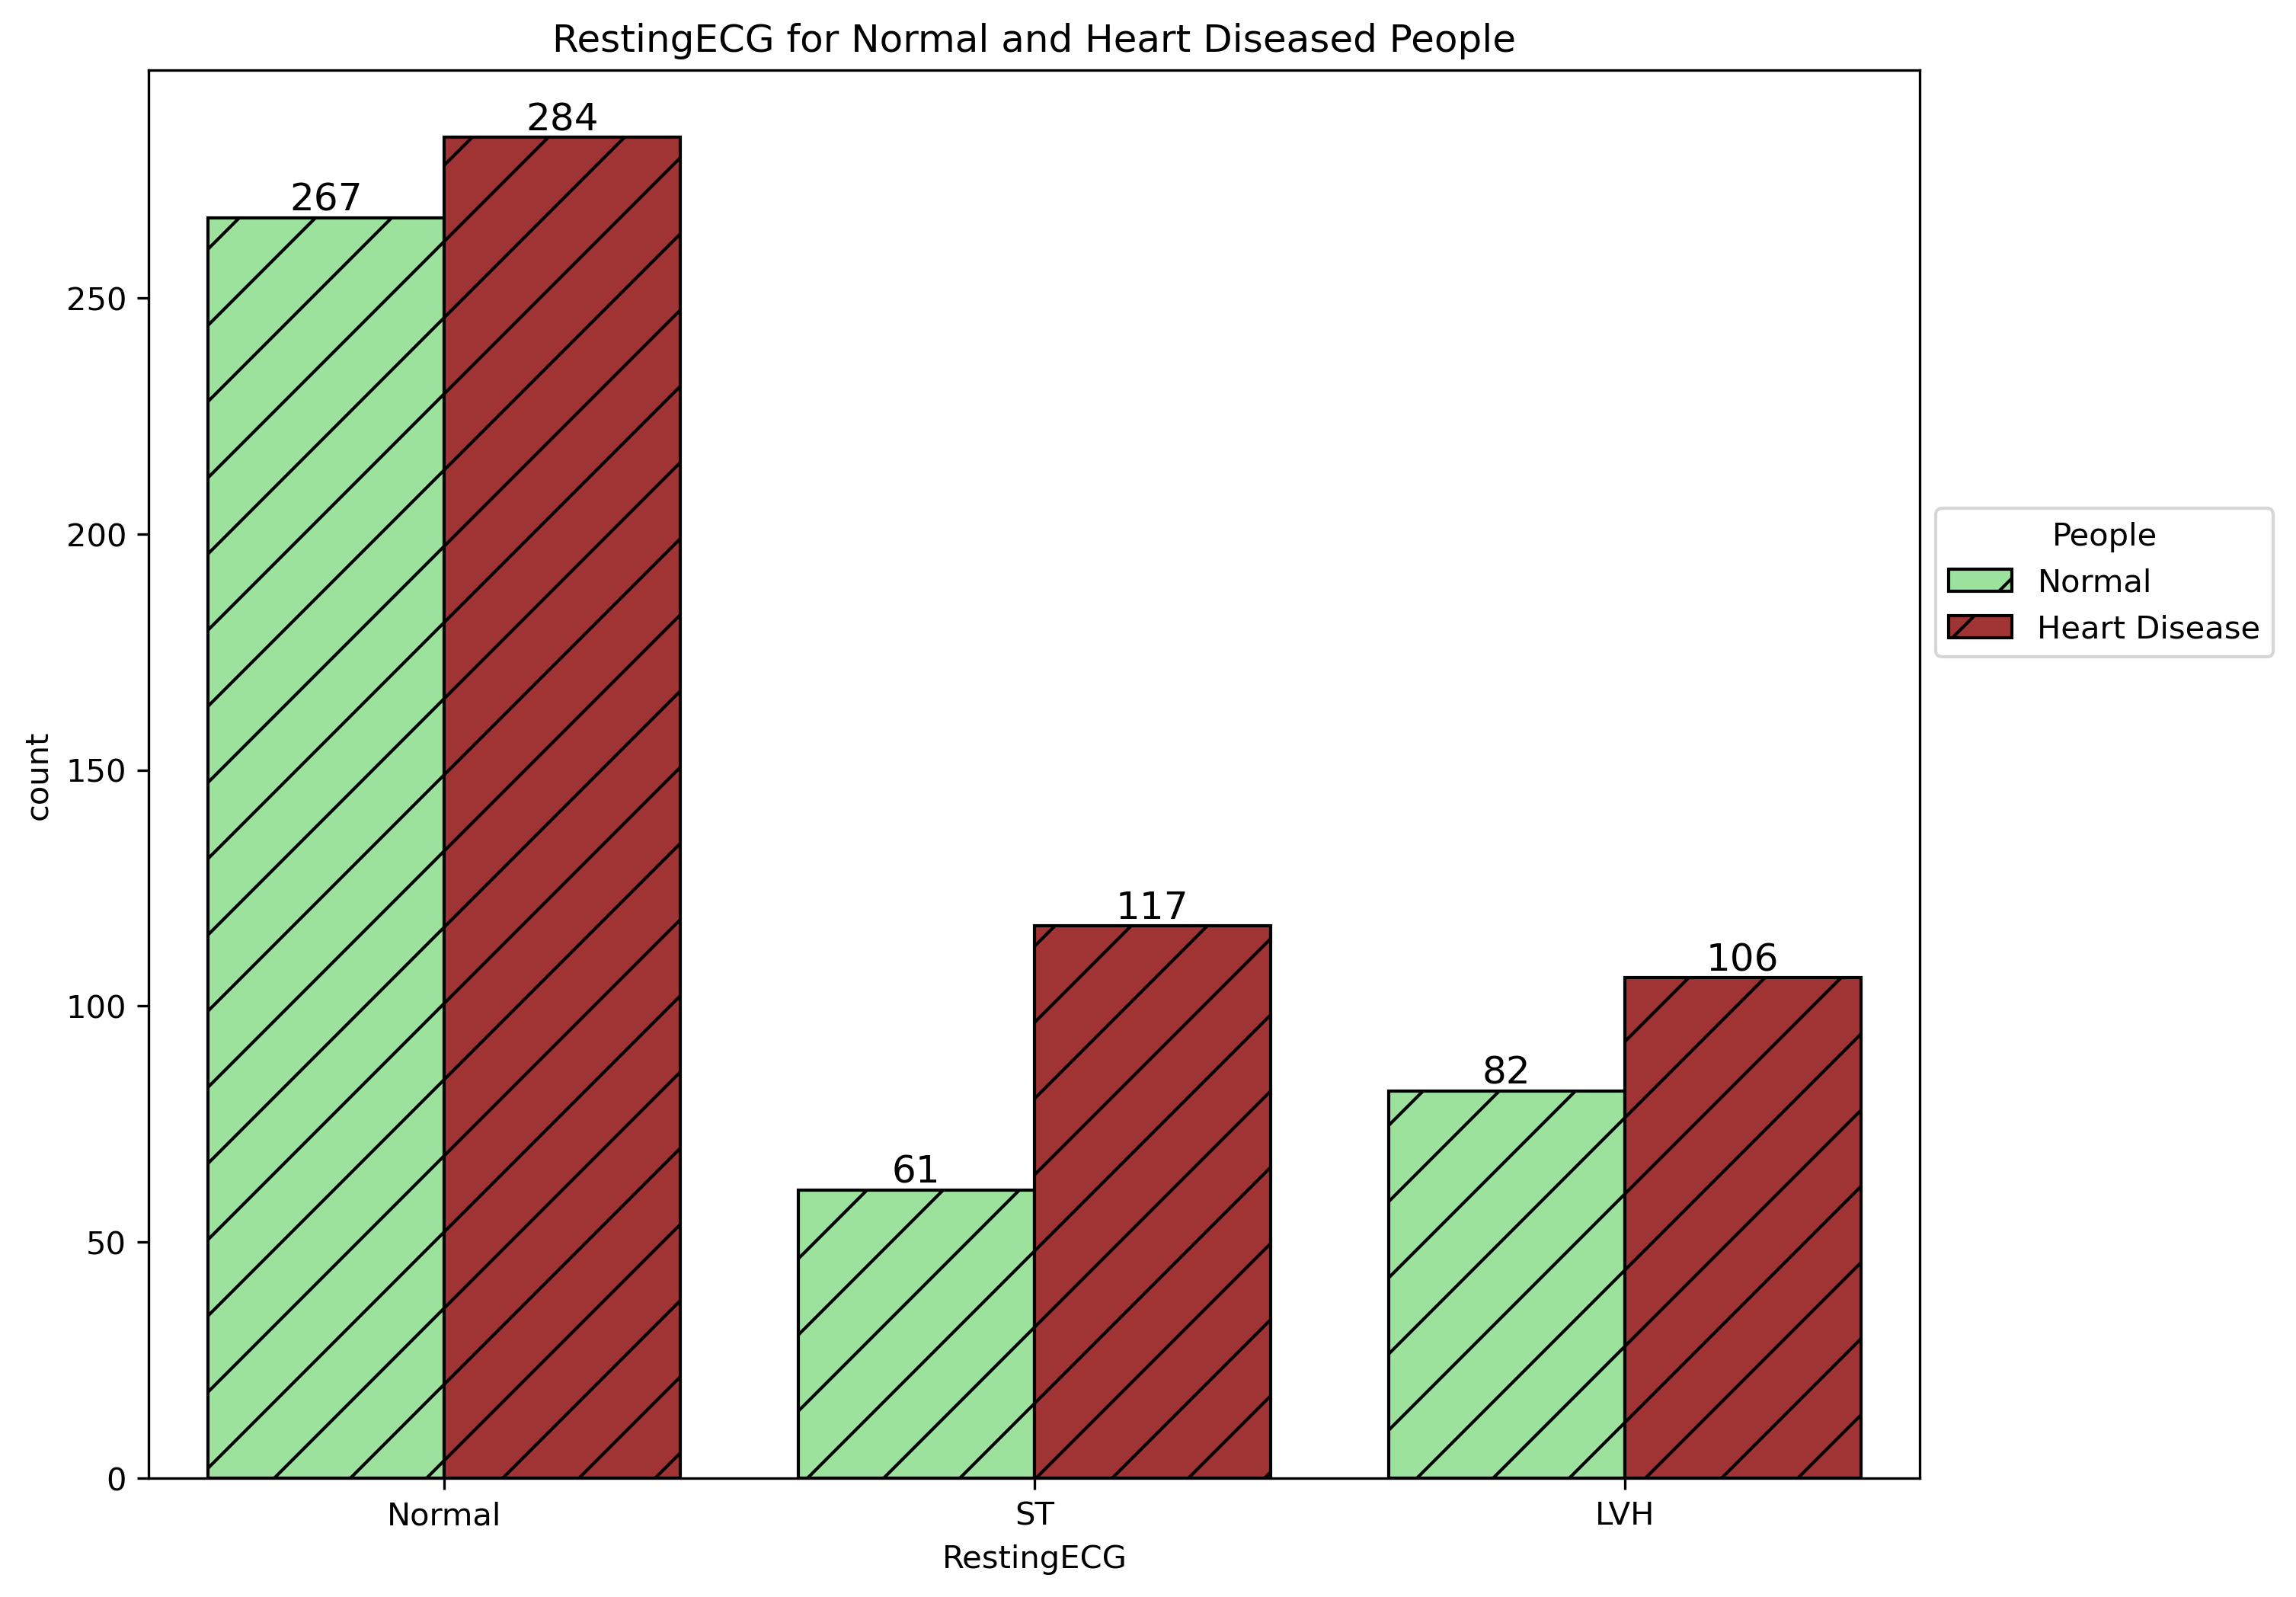

In [15]:
plt.figure(figsize=(10,8), dpi=300)
ax = sns.countplot(data=df, x="RestingECG", hue="HeartDisease", palette=["lightgreen", "firebrick"], edgecolor="black", hatch="/")
plt.legend(title='People', loc='upper left', labels=['Normal', 'Heart Disease'], bbox_to_anchor=(1, 0.7))
ax.bar_label(ax.containers[0], fmt='%.0f', color="black", fontsize=12)
ax.bar_label(ax.containers[1], fmt='%.0f', color="black", fontsize=12)
plt.title("RestingECG for Normal and Heart Diseased People")

In [16]:
def catplot_bringer(x_axis_value, palette):
    ax = sns.catplot(x=x_axis_value, hue="Sex", col="HeartDisease",
                data=df, kind="count",
                height=5, aspect=.9, palette=palette)
    plt.suptitle(x_axis_value + " Comparison of\nNormal and Heart Diseased People by Gender", y=1.2, size=16, fontweight="bold")
    ax.fig.set_dpi(350)

C:\Users\Hp\AnacondaFolder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



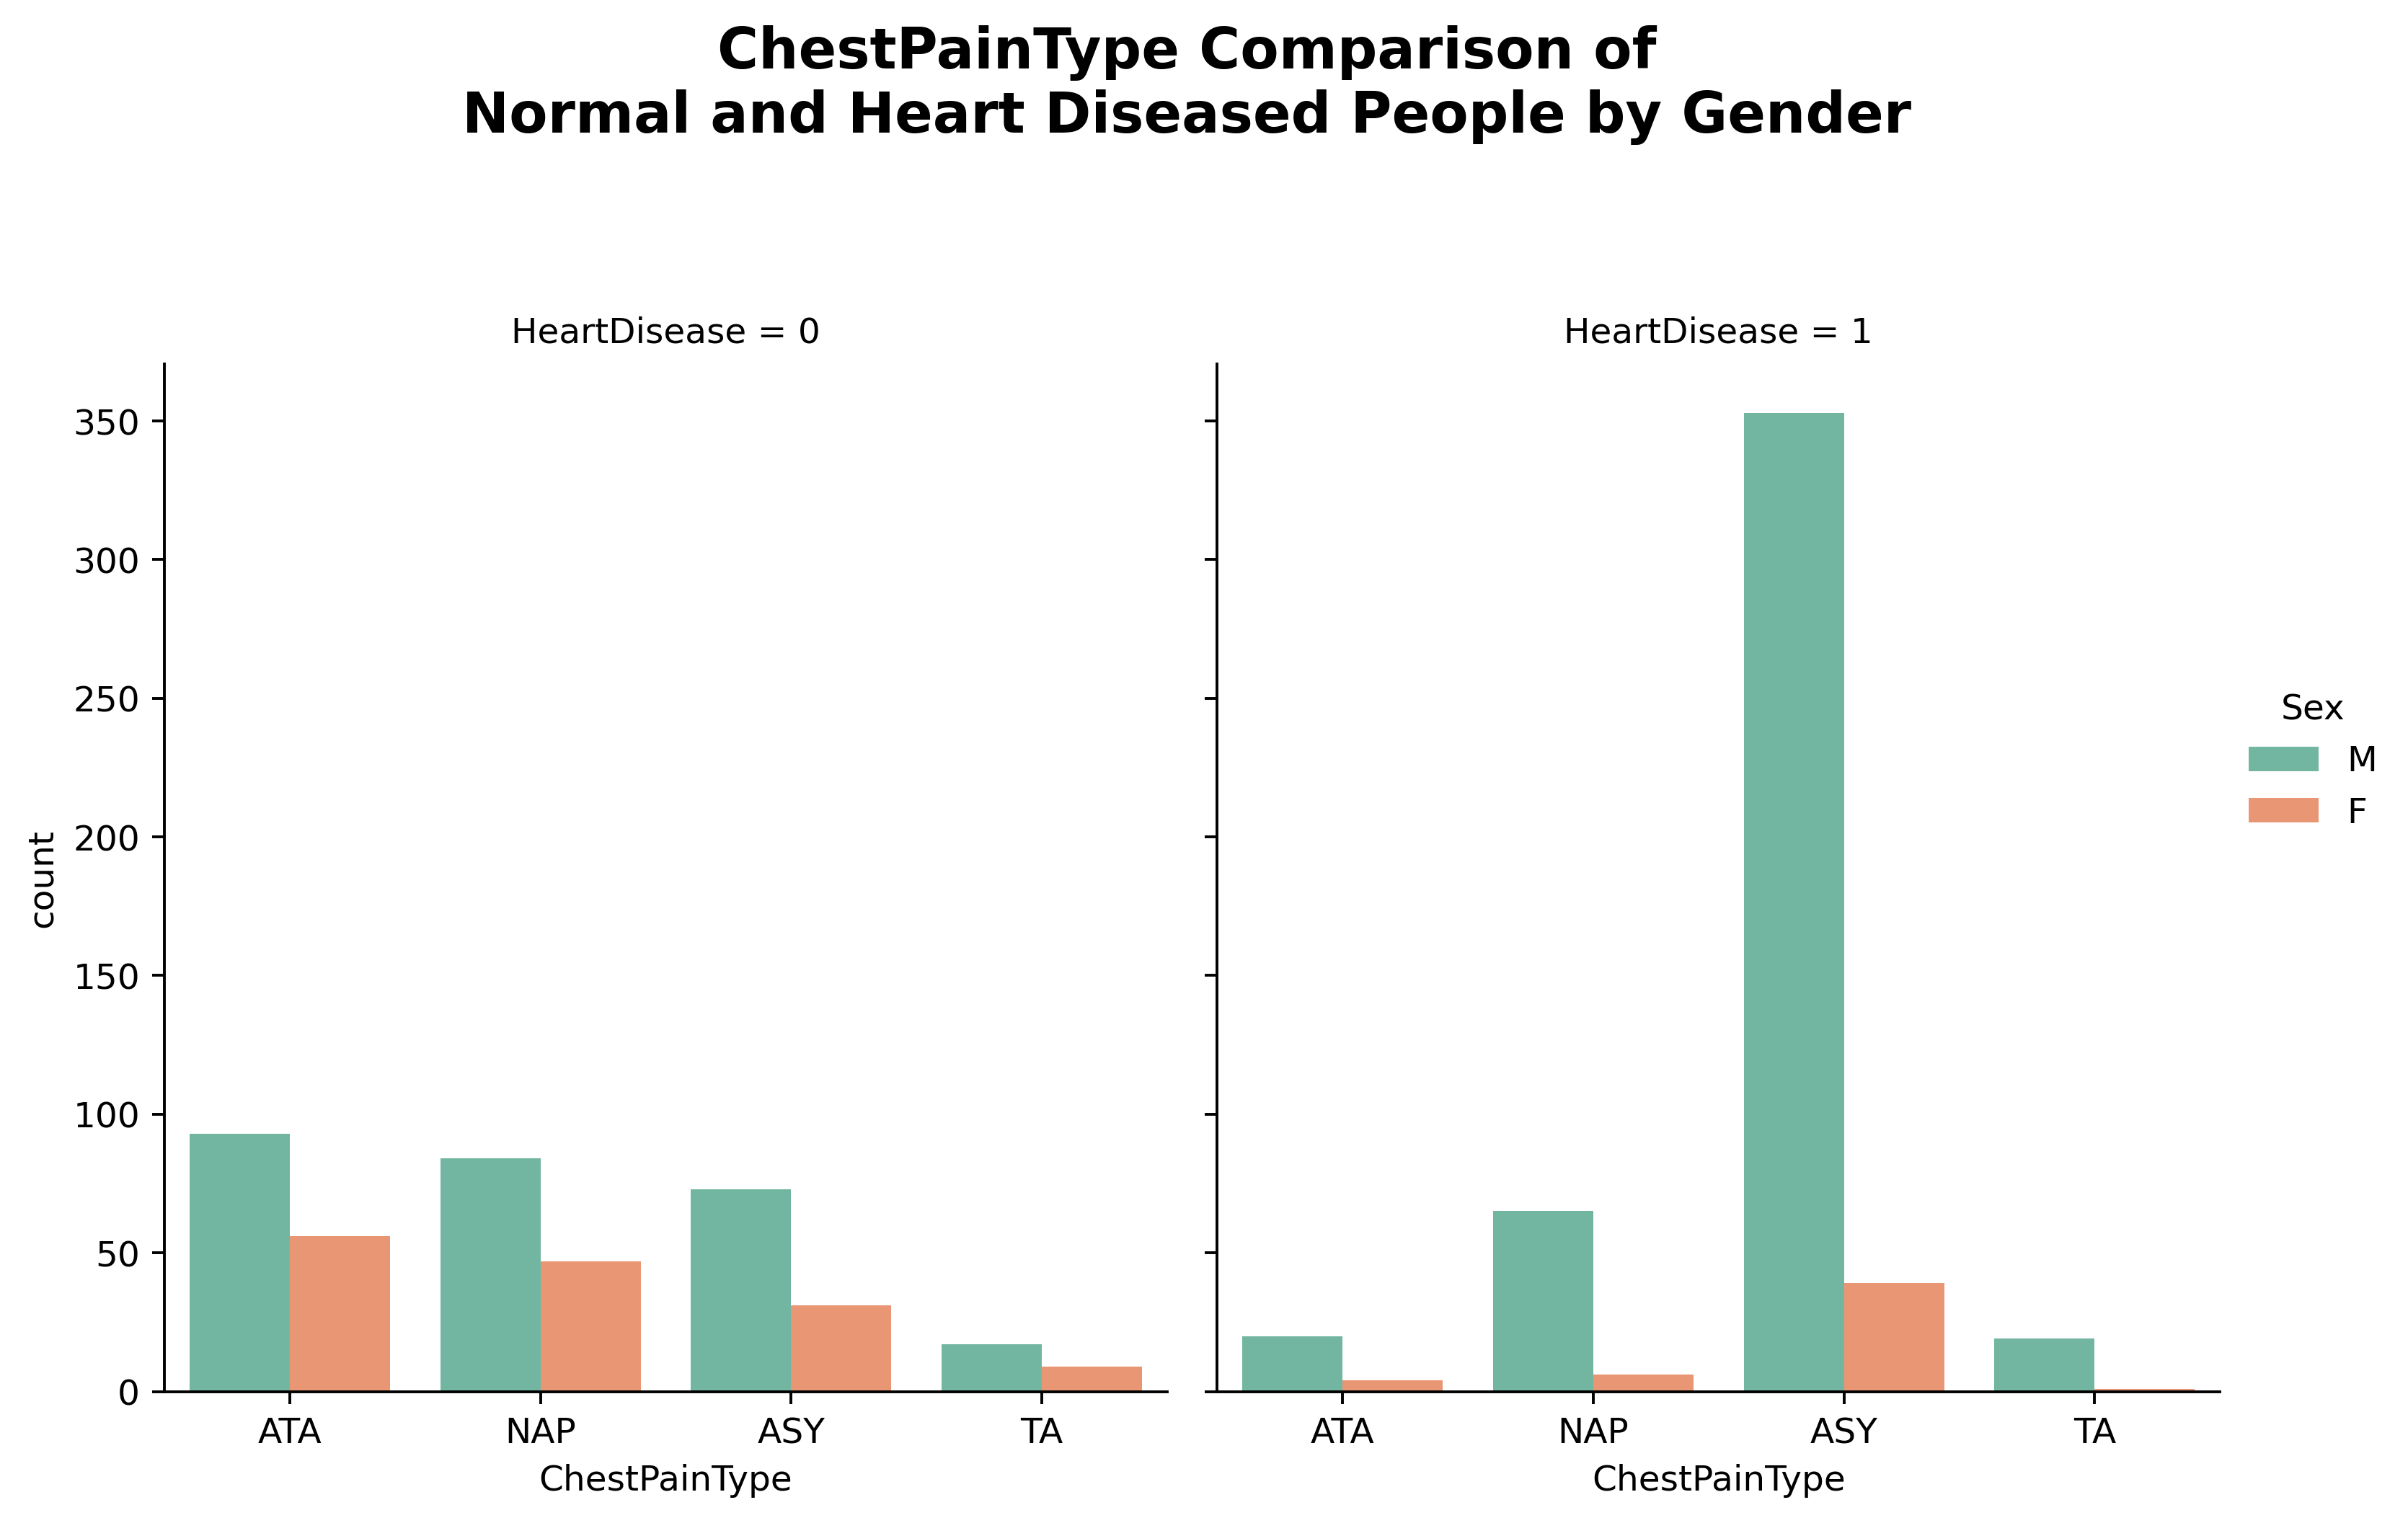

In [17]:
catplot_bringer("ChestPainType", "Set2")

C:\Users\Hp\AnacondaFolder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



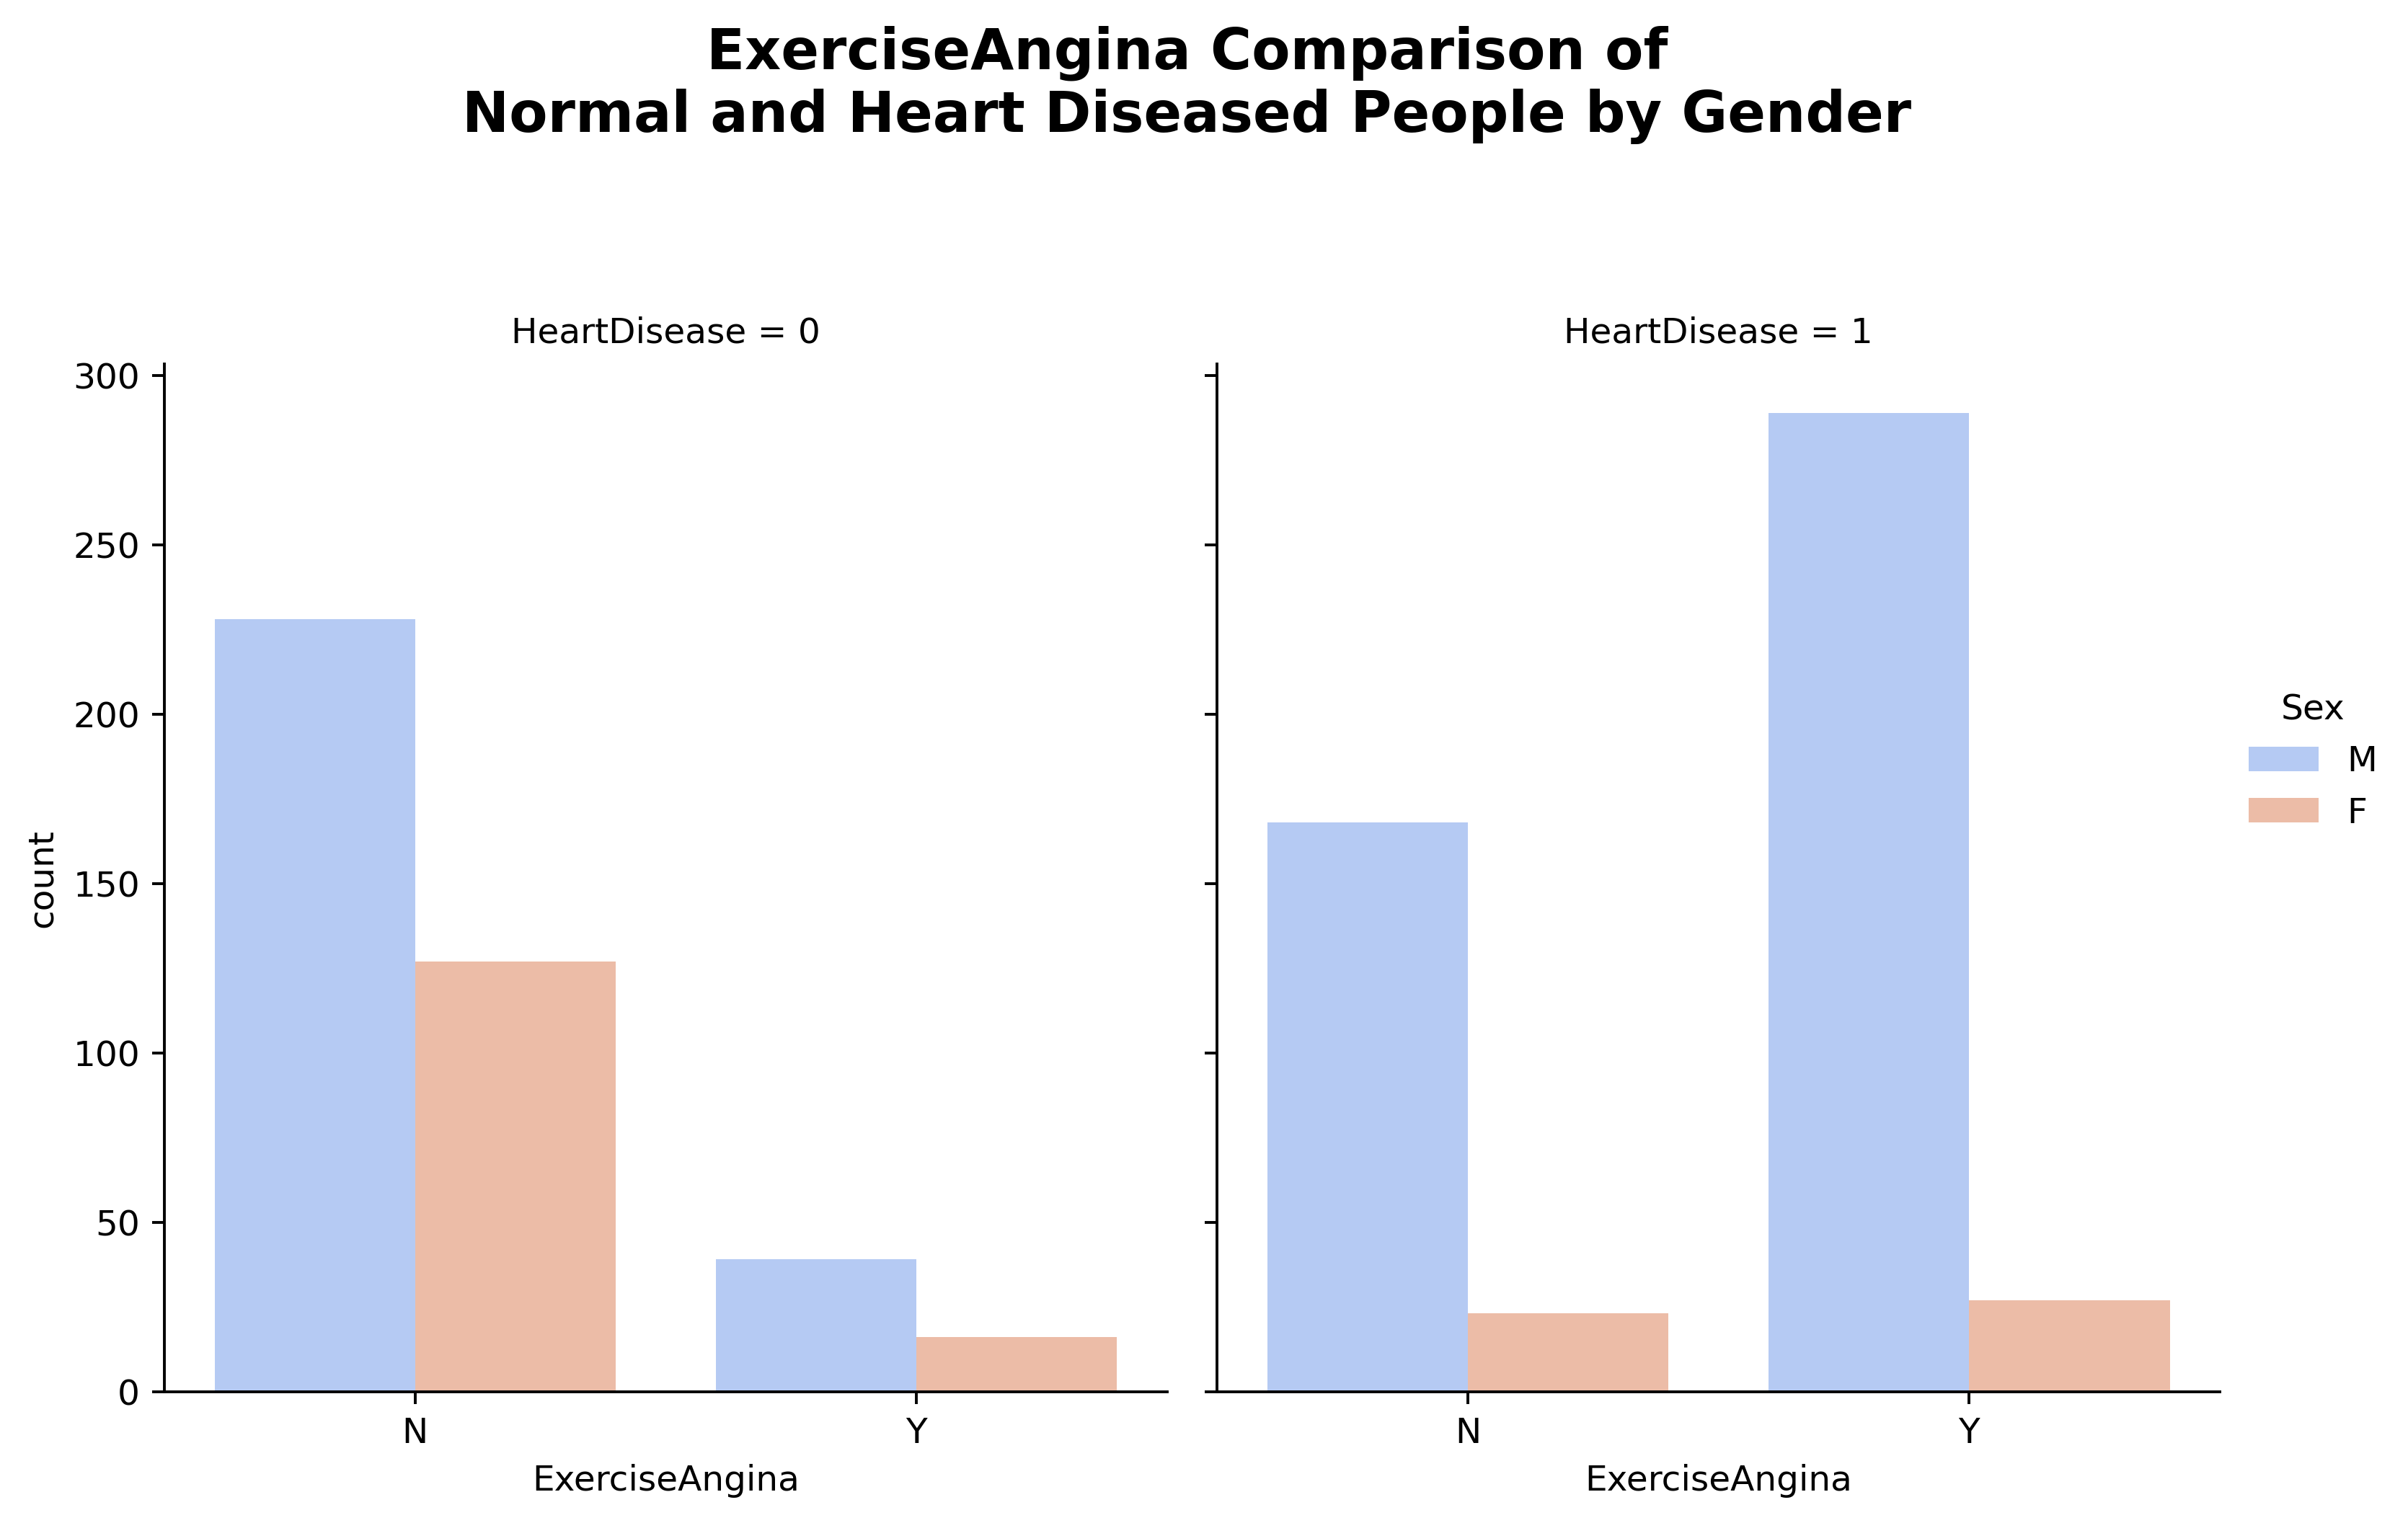

In [18]:
catplot_bringer("ExerciseAngina", "coolwarm")

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
encoder=LabelEncoder()
x=df.drop("HeartDisease",axis=1)
y=df['HeartDisease']

In [21]:
for col in x.columns:
    x[col]=encoder.fit_transform(x[col])
    y.head()

In [22]:
    y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,shuffle=True,random_state=42)

In [24]:
print("x_train shape = ", x_train.shape)
print("y_train shape = ", y_train.shape)
print("x_test shape = ", x_test.shape)
print("y_test shape = ", y_test.shape)

x_train shape =  (641, 11)
y_train shape =  (641,)
x_test shape =  (276, 11)
y_test shape =  (276,)


In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt_model = DecisionTreeClassifier()

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtl = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dtl.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [28]:
y_pred_gini = dtl.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score
print('Gini model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Gini model accuracy score: 0.8587


In [30]:
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

[Text(0.5, 0.875, 'x[10] <= 1.5\ngini = 0.499\nsamples = 641\nvalue = [303, 338]'),
 Text(0.25, 0.625, 'x[2] <= 0.5\ngini = 0.309\nsamples = 362\nvalue = [69, 293]'),
 Text(0.125, 0.375, 'x[1] <= 0.5\ngini = 0.179\nsamples = 251\nvalue = [25, 226]'),
 Text(0.0625, 0.125, 'gini = 0.411\nsamples = 38\nvalue = [11, 27]'),
 Text(0.1875, 0.125, 'gini = 0.123\nsamples = 213\nvalue = [14, 199]'),
 Text(0.375, 0.375, 'x[7] <= 62.5\ngini = 0.479\nsamples = 111\nvalue = [44, 67]'),
 Text(0.3125, 0.125, 'gini = 0.315\nsamples = 46\nvalue = [9, 37]'),
 Text(0.4375, 0.125, 'gini = 0.497\nsamples = 65\nvalue = [35, 30]'),
 Text(0.75, 0.625, 'x[2] <= 0.5\ngini = 0.271\nsamples = 279\nvalue = [234, 45]'),
 Text(0.625, 0.375, 'x[9] <= 14.5\ngini = 0.475\nsamples = 90\nvalue = [55, 35]'),
 Text(0.5625, 0.125, 'gini = 0.379\nsamples = 63\nvalue = [47, 16]'),
 Text(0.6875, 0.125, 'gini = 0.417\nsamples = 27\nvalue = [8, 19]'),
 Text(0.875, 0.375, 'x[9] <= 32.0\ngini = 0.1\nsamples = 189\nvalue = [179, 10]

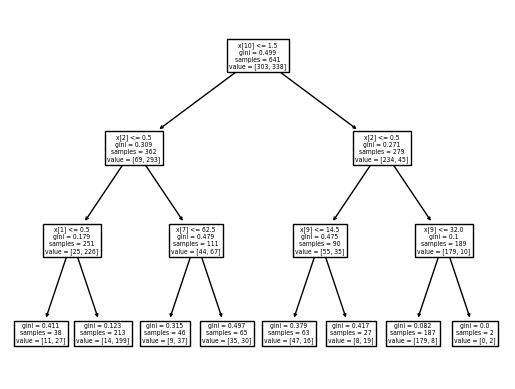

In [31]:
from sklearn import tree
tree.plot_tree(dtl.fit(x_train, y_train))

In [32]:
en_dtl = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
en_dtl.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [33]:
y_pred_en = en_dtl.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score
print('Entropy model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Entropy model accuracy score: 0.8514


[Text(0.5, 0.875, 'x[10] <= 1.5\nentropy = 0.998\nsamples = 641\nvalue = [303, 338]'),
 Text(0.25, 0.625, 'x[2] <= 0.5\nentropy = 0.703\nsamples = 362\nvalue = [69, 293]'),
 Text(0.125, 0.375, 'x[1] <= 0.5\nentropy = 0.468\nsamples = 251\nvalue = [25, 226]'),
 Text(0.0625, 0.125, 'entropy = 0.868\nsamples = 38\nvalue = [11, 27]'),
 Text(0.1875, 0.125, 'entropy = 0.35\nsamples = 213\nvalue = [14, 199]'),
 Text(0.375, 0.375, 'x[7] <= 62.5\nentropy = 0.969\nsamples = 111\nvalue = [44, 67]'),
 Text(0.3125, 0.125, 'entropy = 0.713\nsamples = 46\nvalue = [9, 37]'),
 Text(0.4375, 0.125, 'entropy = 0.996\nsamples = 65\nvalue = [35, 30]'),
 Text(0.75, 0.625, 'x[2] <= 0.5\nentropy = 0.637\nsamples = 279\nvalue = [234, 45]'),
 Text(0.625, 0.375, 'x[9] <= 14.5\nentropy = 0.964\nsamples = 90\nvalue = [55, 35]'),
 Text(0.5625, 0.125, 'entropy = 0.818\nsamples = 63\nvalue = [47, 16]'),
 Text(0.6875, 0.125, 'entropy = 0.877\nsamples = 27\nvalue = [8, 19]'),
 Text(0.875, 0.375, 'x[4] <= 17.0\nentropy =

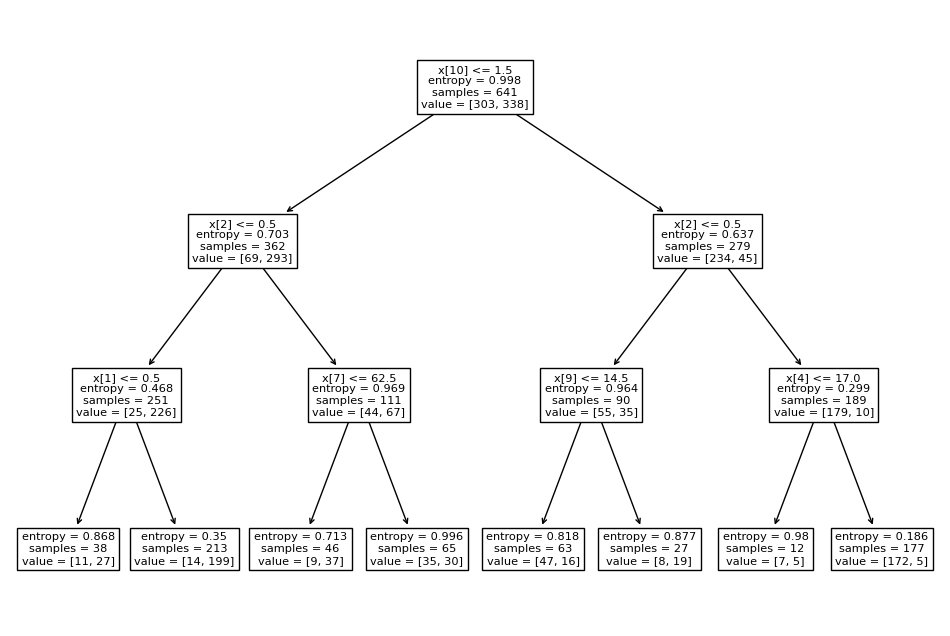

In [35]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(en_dtl.fit(x_train, y_train)) 

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 93  14]
 [ 27 142]]


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       107
           1       0.91      0.84      0.87       169

    accuracy                           0.85       276
   macro avg       0.84      0.85      0.85       276
weighted avg       0.86      0.85      0.85       276



In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7]
}


In [39]:
dtl = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dtl, param_grid, cv=5)

In [40]:
grid_search.fit(x_train, y_train)
print("Best parameter:", grid_search.best_params_)
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(x_test)
print('Model accuracy score with best parameters: {0:0.4f}'.format(accuracy_score(y_test, y_pred_best)))

Best parameter: {'criterion': 'gini', 'max_depth': 3}
Model accuracy score with best parameters: 0.8587


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Membangun model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model pada data latih
rf_model.fit(x_train, y_train)

# Melakukan prediksi pada data uji
y_pred = rf_model.predict(x_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8731884057971014

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       107
           1       0.90      0.89      0.90       169

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276


Confusion Matrix:
 [[ 91  16]
 [ 19 150]]


In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [59]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.13043478260869565


In [60]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.13043478260869565


In [61]:
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Use squared=False to get RMSE
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.3611575592573076


In [62]:
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

R-squared (R2): 0.4505336503898688


In [44]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate KNN Regression model
knn_reg = KNeighborsRegressor(n_neighbors=5)  # Adjust n_neighbors as needed

# Train the model
knn_reg.fit(x_train, y_train)

KNeighborsRegressor()

In [46]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model
model_knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) here

# Now you can use the model for training and prediction
# For example:
model_knn.fit(x_train, y_train)  # X_train and y_train are your training data
y_pred = model_knn.predict(x_test)  # X_test is your test data

# Remember to replace X_train, y_train, and X_test with your actual training and test data

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Example: Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Example: Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.75
Confusion Matrix:
[[ 87  20]
 [ 49 120]]


In [48]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Create and train the KNN model using scaled data
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)

# Make predictions using scaled test data
y_pred = model_knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8586956521739131


In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9, 11]} 

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)
print("Best Model Parameters:", grid_search.best_params_)

Best Model Accuracy: 0.8586956521739131
Best Model Parameters: {'n_neighbors': 5}


In [50]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the top k features based on ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=10)  # Adjust k based on feature importance analysis
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Create and train the KNN model using selected features
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_selected, y_train)

# Make predictions using selected test features
y_pred = model_knn.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Feature Selection:", accuracy)

Accuracy with Feature Selection: 0.8695652173913043


In [52]:
#Implementing k-fold cross validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [53]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7) 

In [54]:
num_folds = 7 # Example: use 5-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [56]:
cross_val_scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores for each fold
print("Cross-validation scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_accuracy = cross_val_scores.mean()
std_accuracy = cross_val_scores.std()
print("Mean accuracy:", mean_accuracy)
print("Standard deviation of accuracy:", std_accuracy)

Cross-validation scores: [0.7480916  0.75572519 0.71755725 0.74045802 0.74045802 0.73282443
 0.75572519]
Mean accuracy: 0.7415485278080699
Standard deviation of accuracy: 0.012529035216004446
